# **Walmart🏬-Confidence Interval and CLT**💹

<img src="https://thebrandhopper.com/wp-content/uploads/2020/11/large.png">

# **About Walmart⭐**  

Walmart is an **American multinational retail corporation** that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has **more than 100 million customers worldwide💪**

# **Business Problem👀**

The Management team at Walmart Inc. wants to analyze

* The **customer purchase behavior🛒**   (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

* They want to understand if the **spending habits💸** differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# **About Dataset🧻**

The company collected the transactional data of customers who purchased products from the Walmart Stores during **Black Friday**. The dataset has the following features:

* **User_ID:**	User ID
* **Product_ID:**	Product ID
* **Gender:**	Sex of User
* **Age:**	Age in bins
* **Occupation:**	Occupation(Masked)
* **City_Category:**	Category of the City (A,B,C)
* **StayInCurrentCityYears:**	Number of years stay in current city
* **Marital_Status:**	Marital Status
* **ProductCategory:**	Product Category (Masked)
* **Purchase:**	Purchase Amount

# **Getting help from Libraries📚**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import norm, geom, poisson, expon, boxcox
from scipy import stats

# **Loading the data....⏯**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/walmart_data.csv")

# **Exploring the data...🔎**

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
#Checking the number of rows and columns:
print(f"The number of rows: {df.shape[0]:,} \nThe number of columns: {df.shape[1]}")

The number of rows: 550,068 
The number of columns: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**🔍OBSERVATION🔎**

* The columns **User_ID, Occupation, Marital_Status, Product_Category, Purchase** has **int64** datatype.

* The columns **Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years** are **object** datatype.

In [7]:
#Changing the datatype:
list = df.columns[:-1]
for elem in list:
  df[elem] = df[elem].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
df["Marital_Status"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [9]:
#Changing the values of Marttal Status column:
def change(x):
  if x == 0:
    return "Single"
  else:
    return "Married"

df["Marital_Status"] = df["Marital_Status"].apply(change)

In [10]:
df["Marital_Status"].unique()

['Single', 'Married']
Categories (2, object): ['Single', 'Married']

# **Descriptive statistics📃**

In [11]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**🔍OBSERVATION🔎**

* The minimum purchase amount is **$12.**

* The maximum purchase amount is **$23,961.**

* The mean purchase amount is **$9,264.**

In [12]:
df.describe(include = "category").T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,Single,324731
Product_Category,550068,20,5,150933


**🔍OBSERVATION🔎**

During the black friday sales,

* **User_ID:** Among 550068 records there are **5891 unique user_ids** and the **user_id 1001680** has appeared **maximum number of times**.

* **Product_ID:** Among 550068 records there are **3631 unique Product_IDs** and the **Product_ID P00265242** has appeared **maximum number of times**.

* **Gender:** Among 550068 records the **Male♂** has appeared **maximum number of times**.

* **Age:** Among 550068 records there are **7 unique Age categories** and **the category 26-35** has appeared **maximum number of times**.

* **Occupation:** Among 550068 records there are **21 unique Occupations** and **the Occupatio 4** has appeared **maximum number of times**.

* **City_Category:** Among 550068 records there are **3 unique City_Categories** and **the category B** has appeared **maximum number of times**.

* **Stay_In_Current_City_Years:** Among 550068 records there are **5 unique Stay_In_Current_City_Years category** and **1 year** has appeared **maximum number of times**.

* **Marital_Status:** Among 550068 records the **Single** has appeared **maximum number of times**.

* **Product_Category:** Among 550068 records there are **20 unique Product_Categories** and **the category 5** has appeared **maximum number of times**.




# **Checking the duplicates values and Nulls🔎**

In [13]:
#Checking for duplicates:
df.duplicated().sum()

0

In [14]:
#Checking for nulls:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

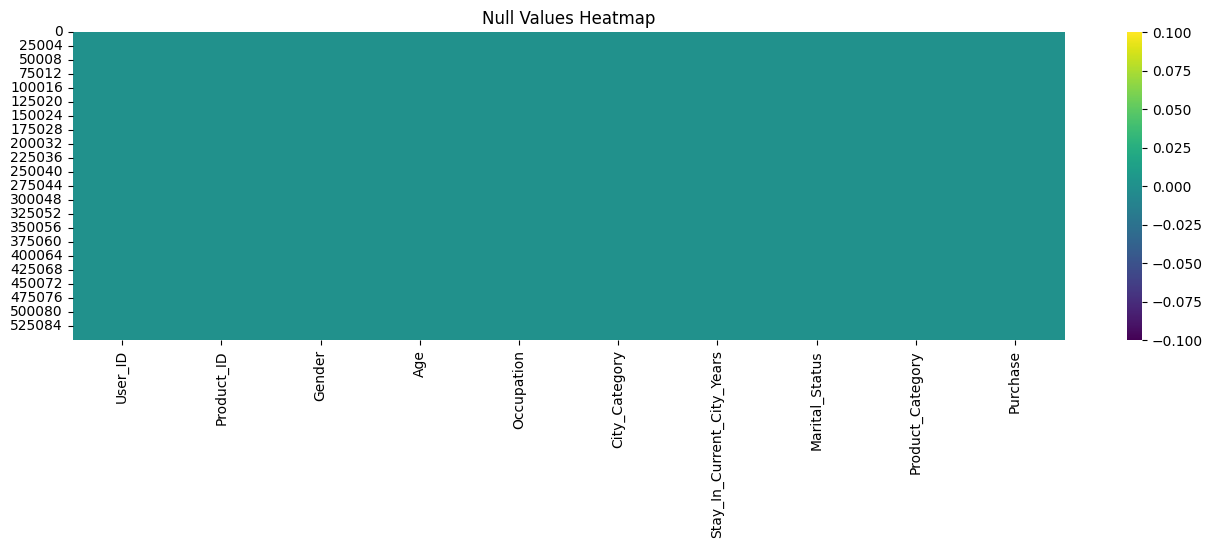

In [15]:
#Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

**🔍OBSERVATION🔎**

There are **no duplicates and null values** in the dataset.

# **Detect Outliers🕵**

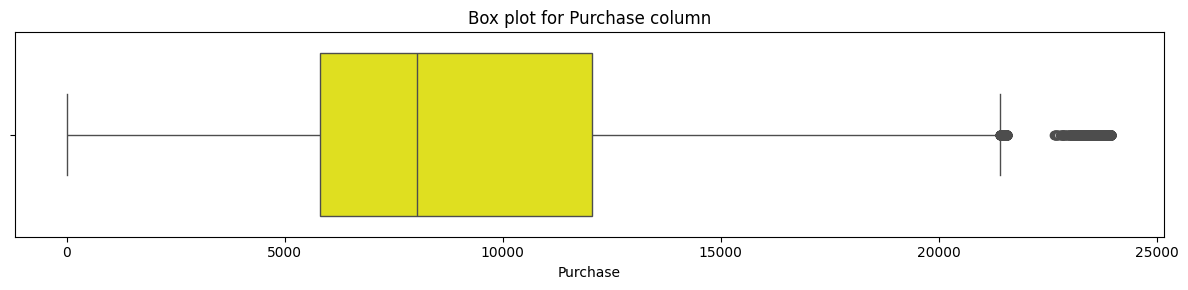

In [16]:
#Box plot for Purchase column:
plt.figure(figsize=(12,3))
sns.boxplot(df["Purchase"],orient="h",color = "yellow")
plt.title("Box plot for Purchase column")
plt.tight_layout()
plt.show()

In [17]:
#Exploring the Box plot:
columns_to_check = ["Purchase"]

def detect_outliers(column):
  Q1 = np.percentile(df[column],25)
  median = np.percentile(df[column],50)
  Q3 = np.percentile(df[column],75)
  IQR = Q3 - Q1
  lower_bound = max(df[column].min(), Q1 - 1.5 * IQR)
  upper_bound = min(df[column].max(), Q3 + 1.5 * IQR)
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  percentage_outliers = (len(outliers)/len(df)) * 100
  print(f"Box plot min:{lower_bound} \nQ1: {Q1} \nMedian: {median} \nQ3: {Q3} \nBox Plot max: {upper_bound}")
  return percentage_outliers

for col in columns_to_check:
    percentage = detect_outliers(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")

Box plot min:12 
Q1: 5823.0 
Median: 8047.0 
Q3: 12054.0 
Box Plot max: 21400.5
Percentage of outliers in column 'Purchase': 0.49%


In [18]:
#Unique values in each columns:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 18105


# **Univariate Analysis📊**

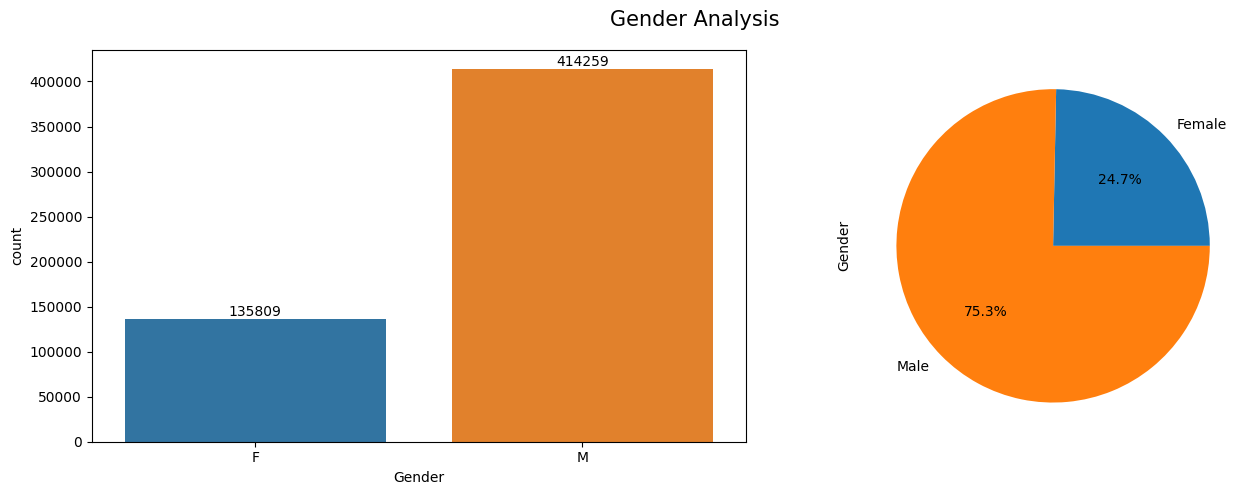

In [19]:
# Gender Analysis:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='Gender', hue = 'Gender')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = ['Female','Male']
plt.pie(df.groupby("Gender")["Gender"].count(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("Gender")

plt.suptitle("Gender Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**


* 🥇The **male**♂ customers are around **75%**
* 🥈The **Female**♀ customers are around **25%**



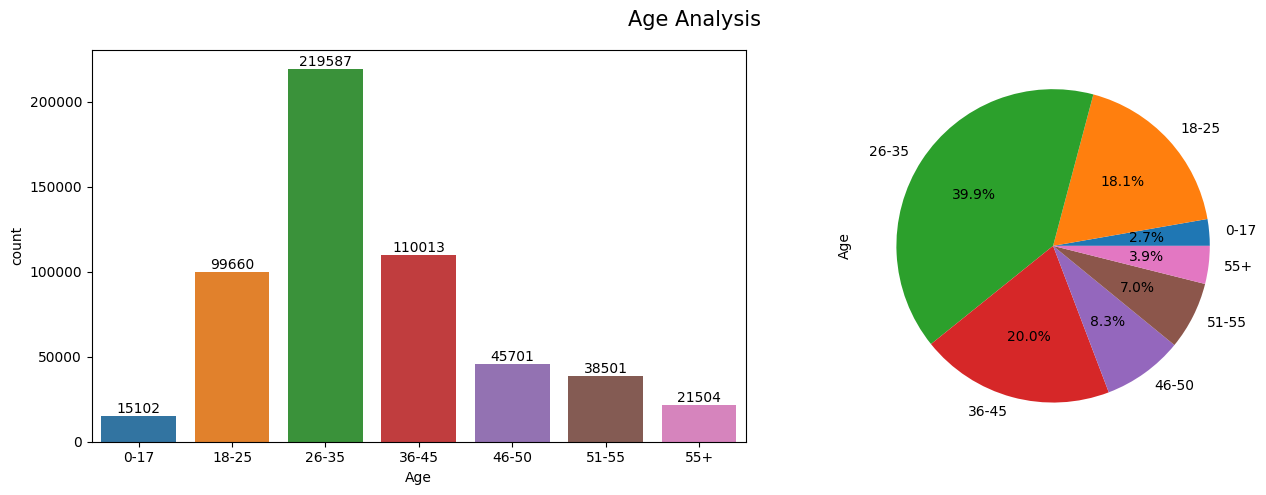

In [20]:
# Age Analysis:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='Age', hue = 'Age')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df["Age"].value_counts().index.categories
plt.pie(df.groupby("Age")["Age"].count(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("Age")

plt.suptitle("Age Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

Top three age groups are,

* 🥇The customers in the age group of **26-35**🤑 are around **40%**
* 🥈The customers in the age group of **36-45**💰 are around **20%**
* 🥉The customers in the age group of **18-25**💰 are around **18%**


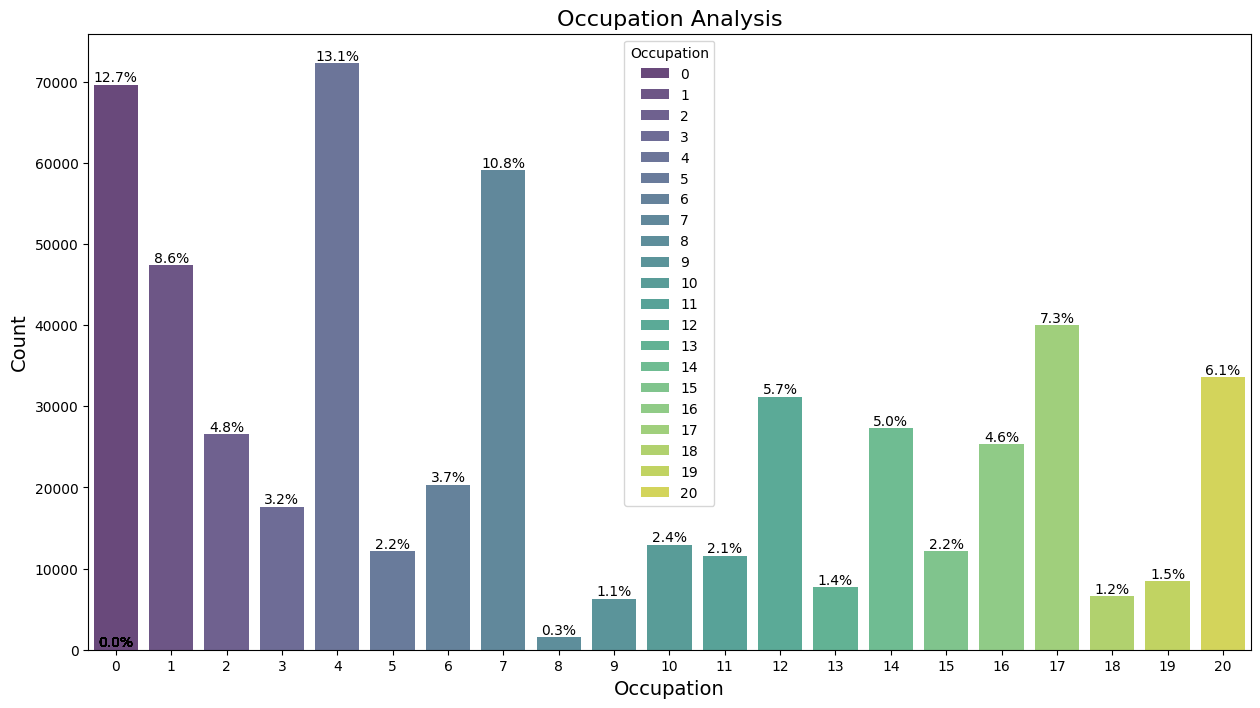

In [21]:
# Occupation Analysis:
# Create the count plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(x = "Occupation", data = df, palette="viridis", hue = "Occupation", alpha=0.8)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Occupation Analysis", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**🔍OBSERVATION🔎**

Top 3 categories of occupation are,

* 🥇The customers in the **occupation category of 4**🤑 are around **13%**
* 🥈The customers in the **occupation category of 0**💰 are around **12.7%**
* 🥉The customers in the **occupation category of 7**💰 are around **10.8%**

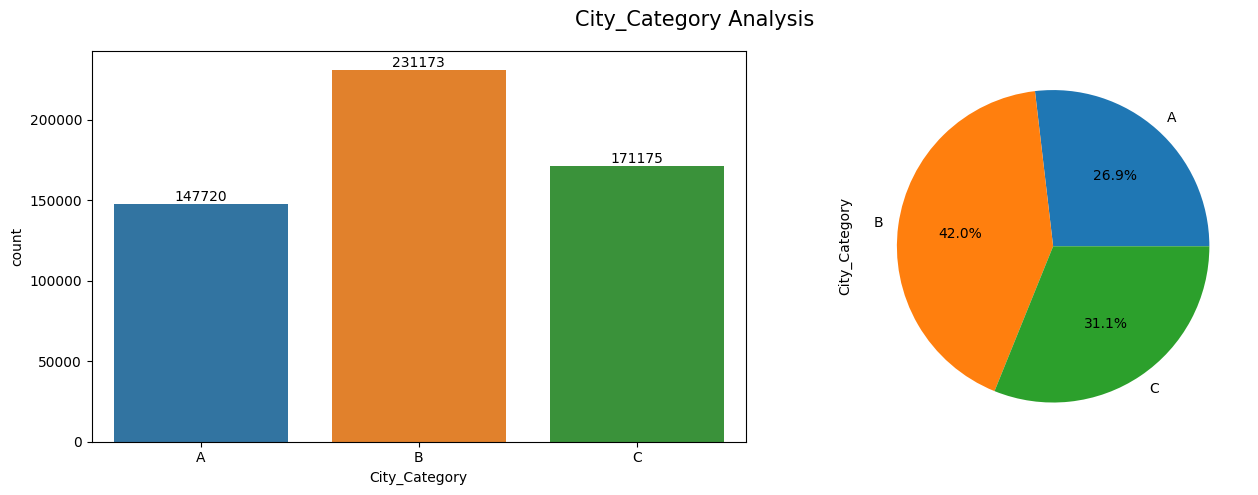

In [22]:
# City_Category Analysis:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='City_Category', hue = 'City_Category')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df["City_Category"].value_counts().index.categories
plt.pie(df.groupby("City_Category")["City_Category"].count(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("City_Category")

plt.suptitle("City_Category Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* 🥇The customers in the **city category B**🤑 are around **42%**
* 🥈The customers in the **city category C**💰 are around **31%**
* 🥉The customers in the **city category A**💰 are around **27%**

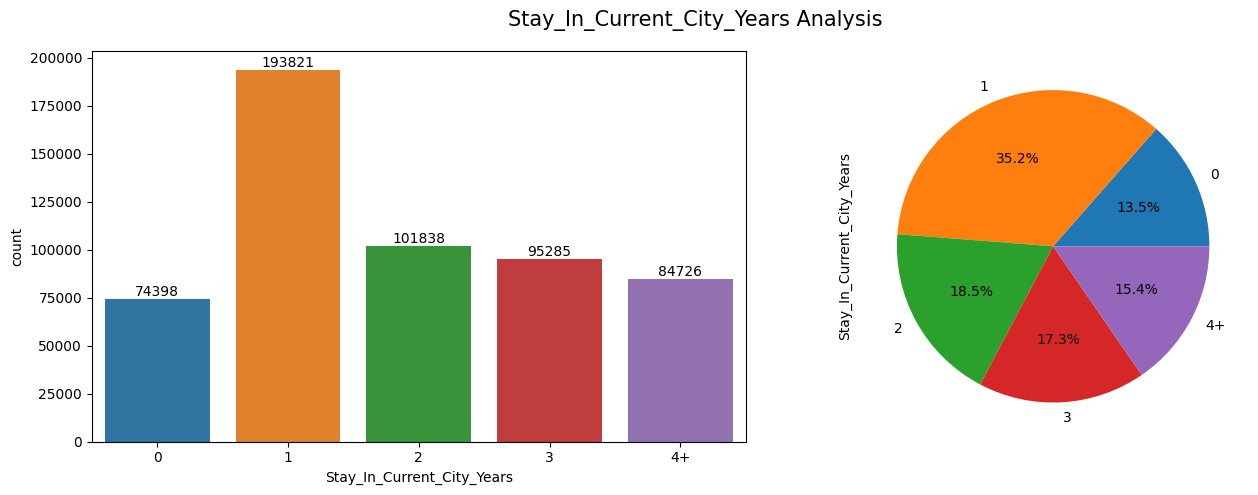

In [23]:
# Stay_In_Current_City_Years Analysis:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='Stay_In_Current_City_Years', hue = 'Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df["Stay_In_Current_City_Years"].value_counts().index.categories
plt.pie(df.groupby("Stay_In_Current_City_Years")["Stay_In_Current_City_Years"].count(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("Stay_In_Current_City_Years")

plt.suptitle("Stay_In_Current_City_Years Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* 🥇The customers who are in the **current city for around 1 year**🤑are around **35%**
* 🥇The customers who are in the **current city for around 2 years**💰are around **18.5%**
* 🥉The customers who are in the **current city for around 3 years**💰are around **17%**

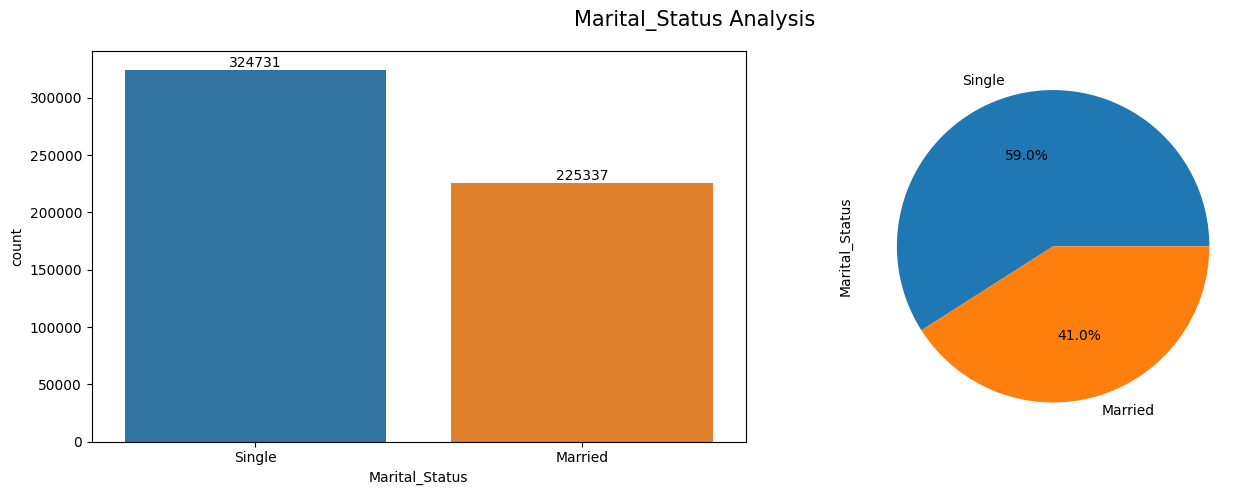

In [24]:
# Marital_Status Analysis:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='Marital_Status', hue = 'Marital_Status')
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df["Marital_Status"].value_counts().index.categories
plt.pie(df.groupby("Marital_Status")["Marital_Status"].count(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("Marital_Status")

plt.suptitle("Marital_Status Analysis", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* 🥇The **Single**🤑 customers are around **60%**
* 🥈The **Married**💰 customers are around **40%**


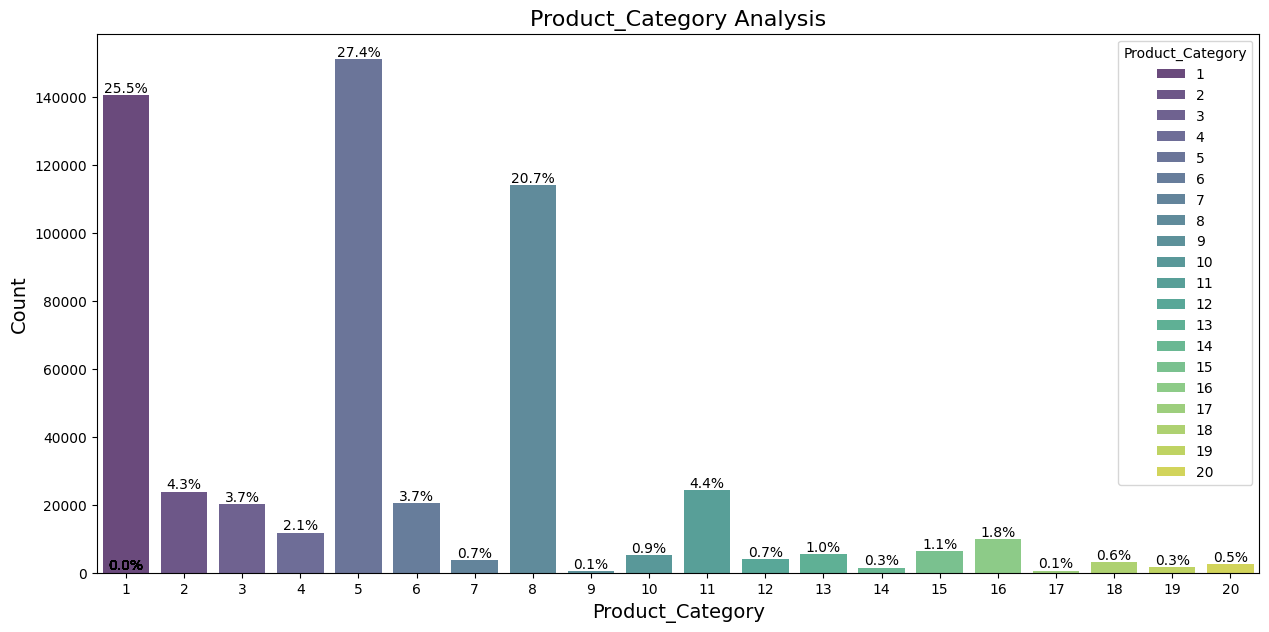

In [25]:
# Product_Category Analysis:
# Create the count plot
plt.figure(figsize=(15, 7))
ax = sns.countplot(x = "Product_Category", data = df, palette="viridis", hue = "Product_Category", alpha=0.8)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Product_Category Analysis", fontsize=16)
plt.xlabel("Product_Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

**🔍OBSERVATION🔎**

* 🥇The customers prefer **product category 5** are around **27%**
* 🥈The customers prefer **product category 1** are around **25%**
* 🥉The customers prefer **product category 8** are around **20%**

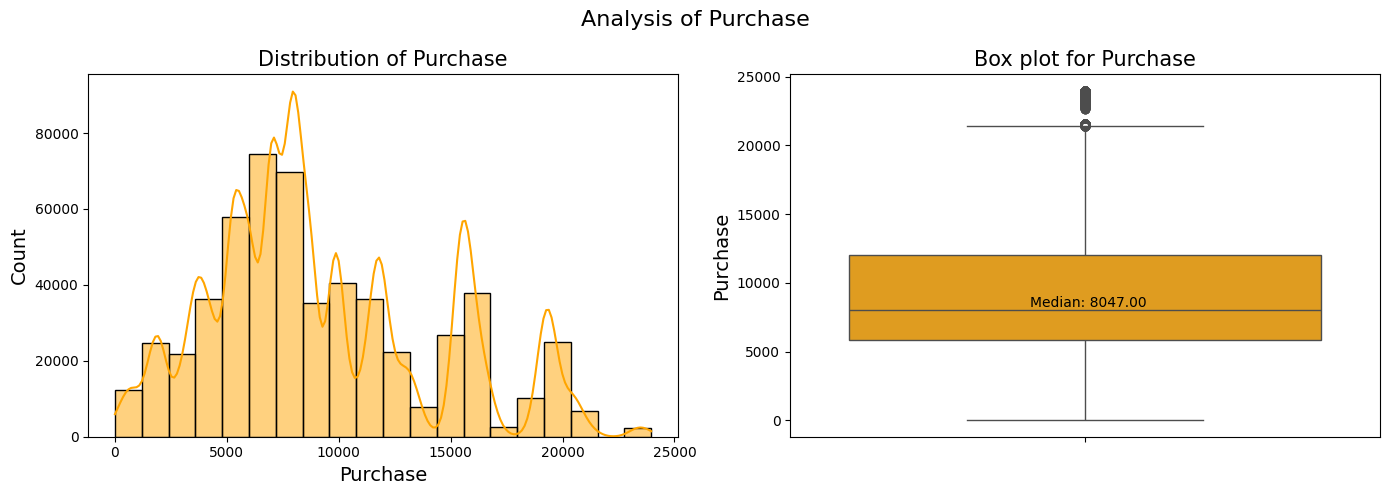

In [26]:
#Analysis of Purchase
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
ax = sns.histplot(x="Purchase", bins=20, data=df, kde=True, color="orange")
# Set plot title and axis labels
plt.title("Distribution of Purchase", fontsize=15)
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(df["Purchase"],orient="v",color = "orange")
median = df['Purchase'].median()
plt.text(x=0.005, y=median, s=f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

plt.title("Box plot for Purchase",fontsize=15)
plt.ylabel("Purchase", fontsize=14)

plt.suptitle("Analysis of Purchase", fontsize = 16)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* The most common purchase amounts are between **5000 to 10,000 dollers**
* **Median** purchase amount is **8047.0 dollers**

# **Multivariate Analysis📊💹**

In [27]:
#Unique values in each columns:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 18105


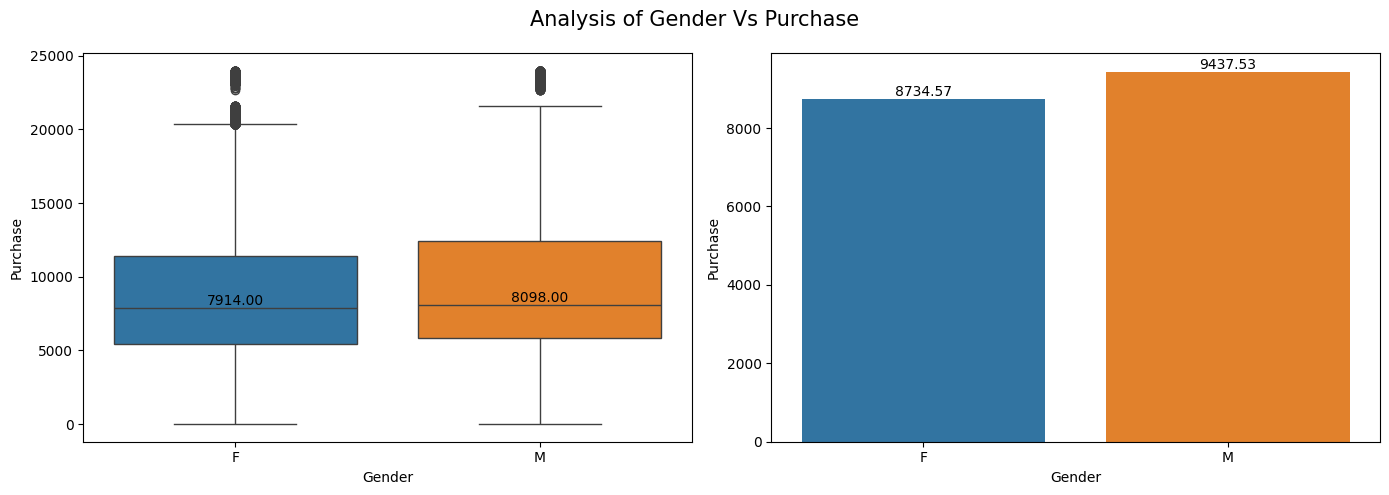

In [28]:
# Analysis of Gender Vs Purchase:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x="Gender", y="Purchase", hue="Gender")
medians = df.groupby('Gender')['Purchase'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Purchase')

plt.subplot(1, 2, 2)
gp = df.groupby("Gender")["Purchase"].mean().to_frame().reset_index()
label = sns.barplot(data = gp, x='Gender', y = 'Purchase', hue="Gender")
for i in label.containers:
    label.bar_label(i)

plt.suptitle("Analysis of Gender Vs Purchase", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
* The **Male customers have contributed for sale**🤑 more than female.
* For Male customers, The **Mean purchase amount is 9437 dollers** and the **Median purchase amounts is 8098 dollers.**

* For Female customers, The **Mean purchase amount is 8734 dollers** and the **Median purchase amounts is 7914 dollers.**

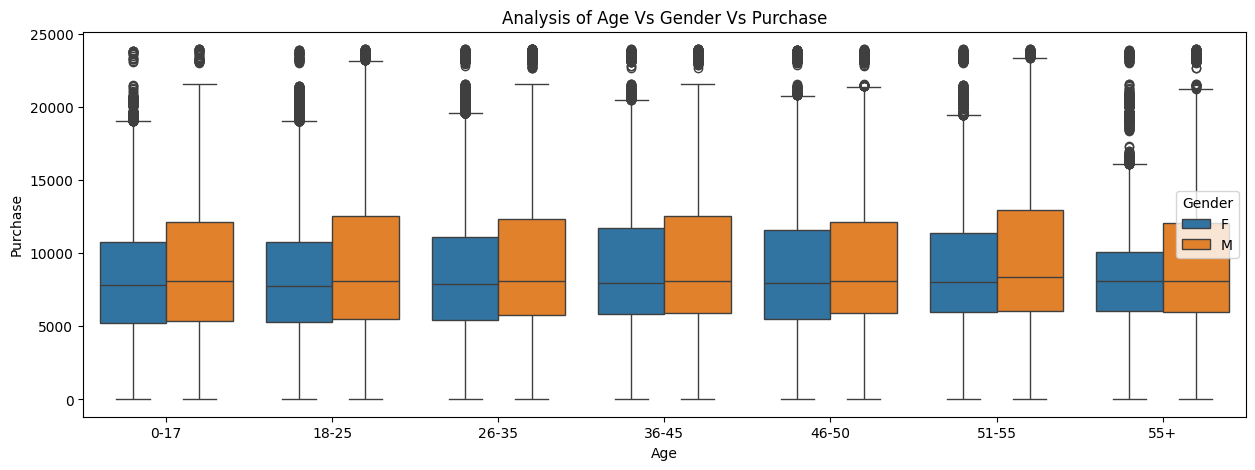

In [29]:
# Analysis of Age Vs Gender Vs Purchase:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df, x = "Age", y ="Purchase", hue = "Gender")
df.groupby(['Age', "Gender"])['Purchase'].median()
plt.title('Analysis of Age Vs Gender Vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

**🔍OBSERVATION🔎**

* **In all the age category male customer purchase are high** than female.

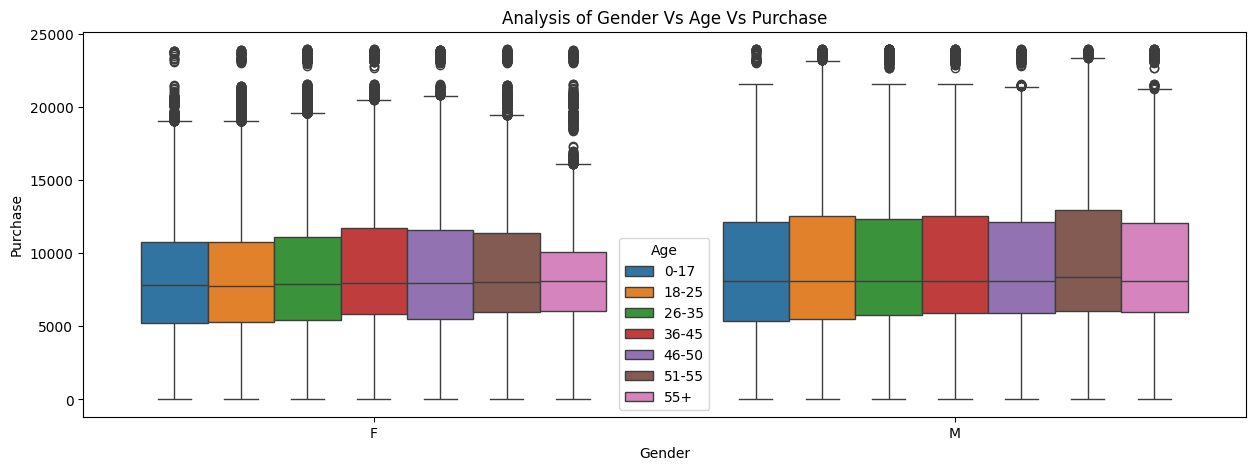

In [30]:
# Analysis of Gender Vs Age Vs Purchase:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df, x = "Gender", y ="Purchase", hue = "Age" )
plt.title('Analysis of Gender Vs Age Vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.show()

**🔍OBSERVATION🔎**

* Among the **Female age cetegory, 36-45 years** have have **higher contribution for purchase.**
* Among the **Male age cetegory, 51-55 years** have have **higher contribution for purchase.**

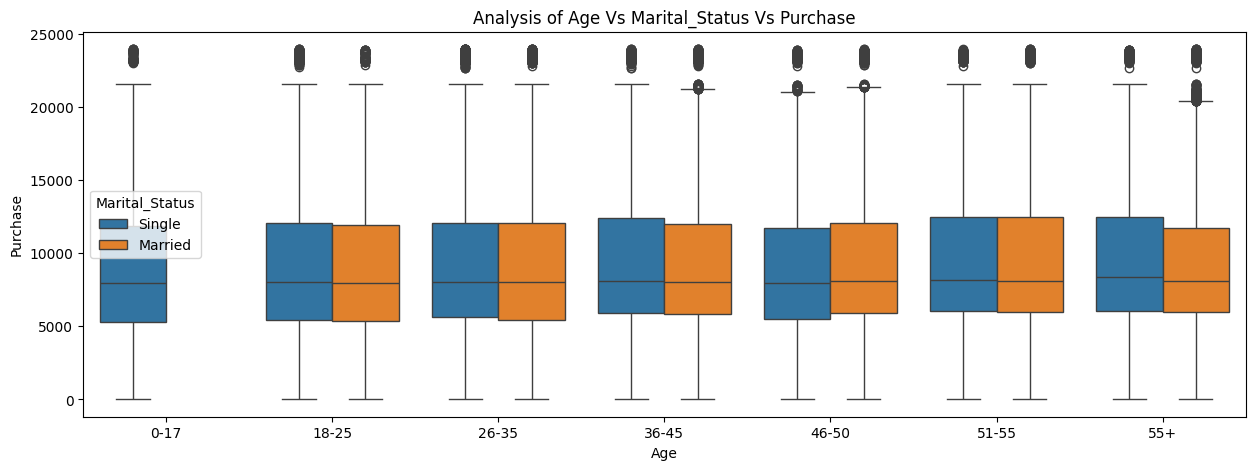

In [31]:
# Analysis of Age Vs Marital_Status Vs Purchase:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df, x = "Age", y ="Purchase", hue = "Marital_Status" )
plt.title('Analysis of Age Vs Marital_Status Vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

**🔍OBSERVATION🔎**

* In the **age group** category of **46-50**, the median **Married customers purchase are high.**
* In the **age group** category of **55+**, the median **Unmarried customers purchase are high.**

* In all the other age group the median between married and unmarried looks almost similar.

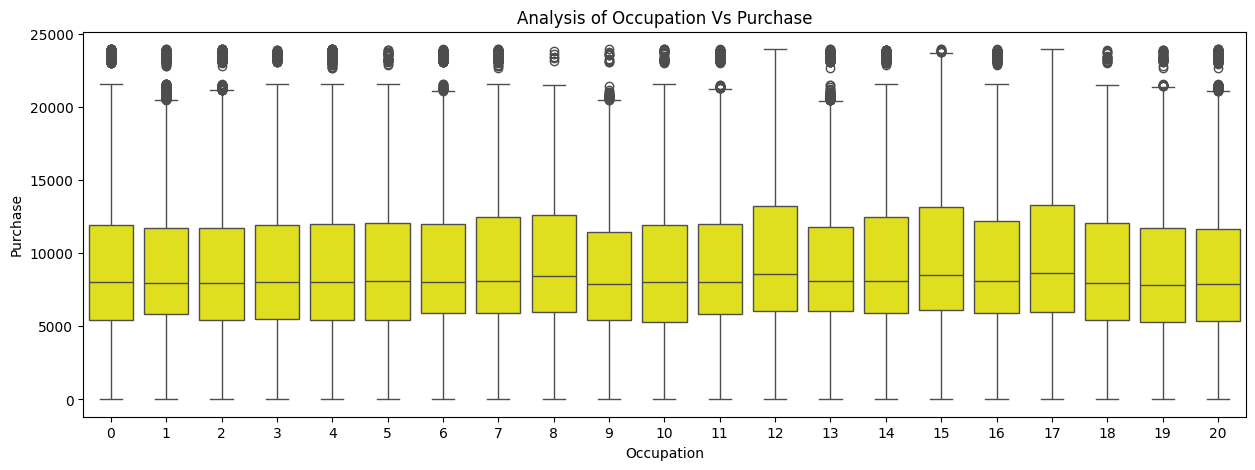

In [32]:
# Analysis of Occupation Vs Purchase:
plt.figure(figsize=(15, 5))
sns.boxplot(data = df, x="Occupation", y="Purchase", color='yellow')
plt.title('Analysis of Occupation Vs Purchase')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.show()

**🔍OBSERVATION🔎**

 Among the all occupation category **the occupation category 8, 12, 15 and 17** median value are higher than the other category.

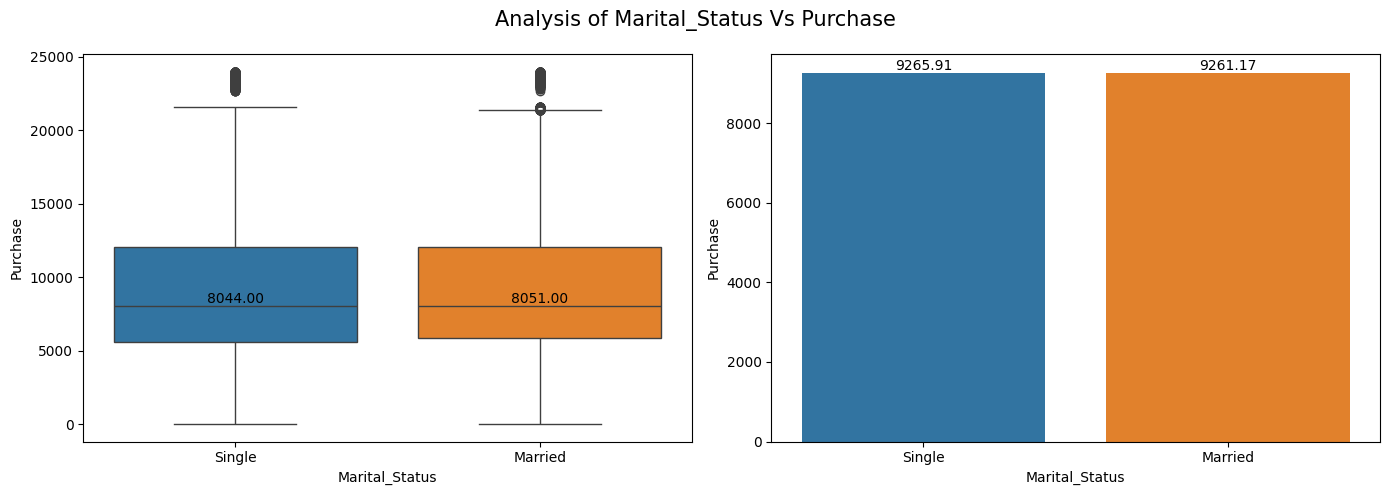

In [33]:
# Analysis of Marital_Status Vs Purchase:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x="Marital_Status", y="Purchase", hue="Marital_Status")
medians = df.groupby('Marital_Status')['Purchase'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
plt.xlabel('Marital_Status')
plt.ylabel('Purchase')

plt.subplot(1, 2, 2)
gp = df.groupby("Marital_Status")["Purchase"].mean().to_frame().reset_index()
label = sns.barplot(data = gp, x='Marital_Status', y = 'Purchase', hue="Marital_Status")
for i in label.containers:
    label.bar_label(i)

plt.suptitle("Analysis of Marital_Status Vs Purchase", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* The **Single and Married customers almost have same contrubution** for the purchase
* For Single customers, The **Mean purchase amount is 9265 dollers** and the **Median purchase amounts is 8044 dollers.**

* For Married customers, The **Mean purchase amount is 9261 dollers** and the **Median purchase amounts is 8051 dollers.**
* The Single and Married customers have same purchase behaviour. Lets us verify that using CLT below.

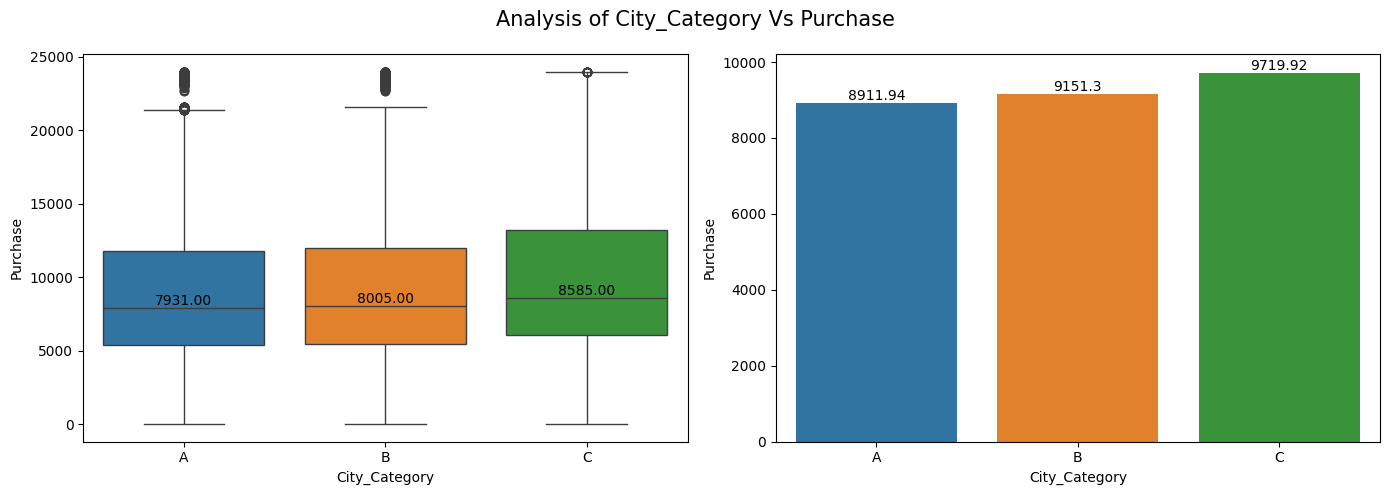

In [34]:
# Analysis of City_Category Vs Purchase:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x="City_Category", y="Purchase", hue="City_Category")
medians = df.groupby('City_Category')['Purchase'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
plt.xlabel('City_Category')
plt.ylabel('Purchase')

plt.subplot(1, 2, 2)
gp = df.groupby("City_Category")["Purchase"].mean().to_frame().reset_index()
label = sns.barplot(data = gp, x='City_Category', y = 'Purchase', hue="City_Category")
for i in label.containers:
    label.bar_label(i)

plt.suptitle("Analysis of City_Category Vs Purchase", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

* The **city category C have contributed more contribution for purchase**🤑even though there are more number of customers in the city category B based on univariate analysis.

* 🥇For city category C, The **Mean purchase amount is 9719 dollers** and the **Median purchase amounts is 8505 dollers.**

* 🥈For city category B, The **Mean purchase amount is 9151 dollers** and the **Median purchase amounts is 8005 dollers.**

* 🥉For city category A, The **Mean purchase amount is 8911 dollers** and the **Median purchase amounts is 7931 dollers.**


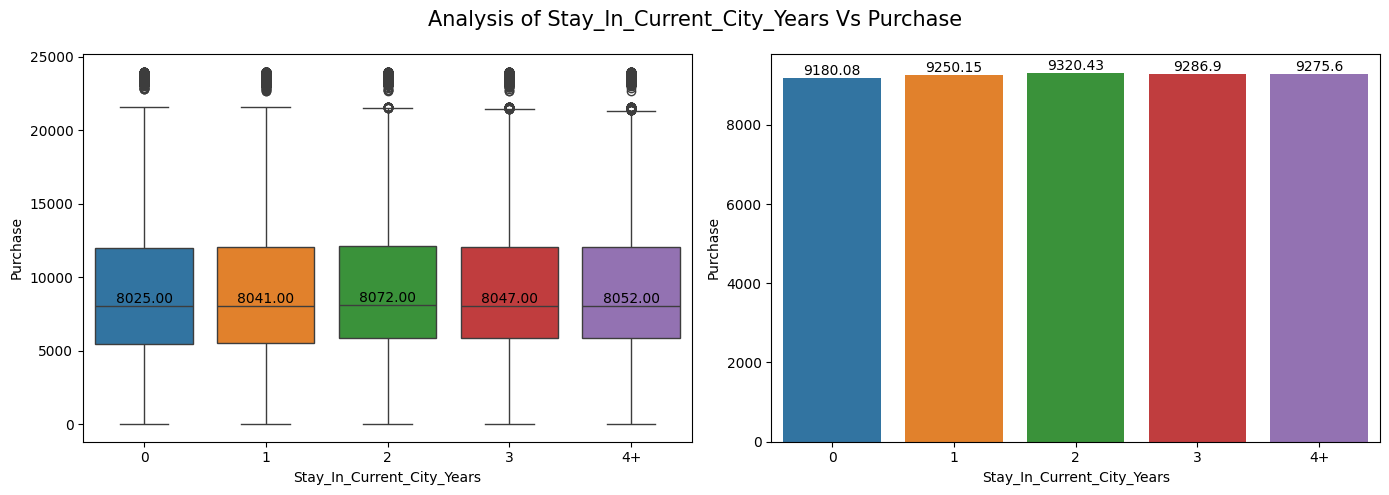

In [35]:
# Analysis of Stay_In_Current_City_Years Vs Purchase:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x="Stay_In_Current_City_Years", y="Purchase", hue="Stay_In_Current_City_Years")
medians = df.groupby('Stay_In_Current_City_Years')['Purchase'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase')

plt.subplot(1, 2, 2)
gp = df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().to_frame().reset_index()
label = sns.barplot(data = gp, x='Stay_In_Current_City_Years', y = 'Purchase', hue="Stay_In_Current_City_Years")
for i in label.containers:
    label.bar_label(i)

plt.suptitle("Analysis of Stay_In_Current_City_Years Vs Purchase", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

For **stay in current years for 2 and 3 years**🤑, have contributed more regarding purchase.

* For stay in current years for 0 year, The **Mean purchase amount is 9180 dollers** and the **Median purchase amounts is 8025 dollers.**

* For stay in current years for 1 year, The **Mean purchase amount is 9250 dollers** and the **Median purchase amounts is 8041 dollers.**

* For stay in current years for 2 years, The **Mean purchase amount is 9320 dollers** and the **Median purchase amounts is 8072 dollers.**

* For stay in current years for 3 years, The **Mean purchase amount is 9286 dollers** and the **Median purchase amounts is 8047 dollers.**

* For stay in current years for 4+ years, The **Mean purchase amount is 9275 dollers** and the **Median purchase amounts is 8052 dollers.**


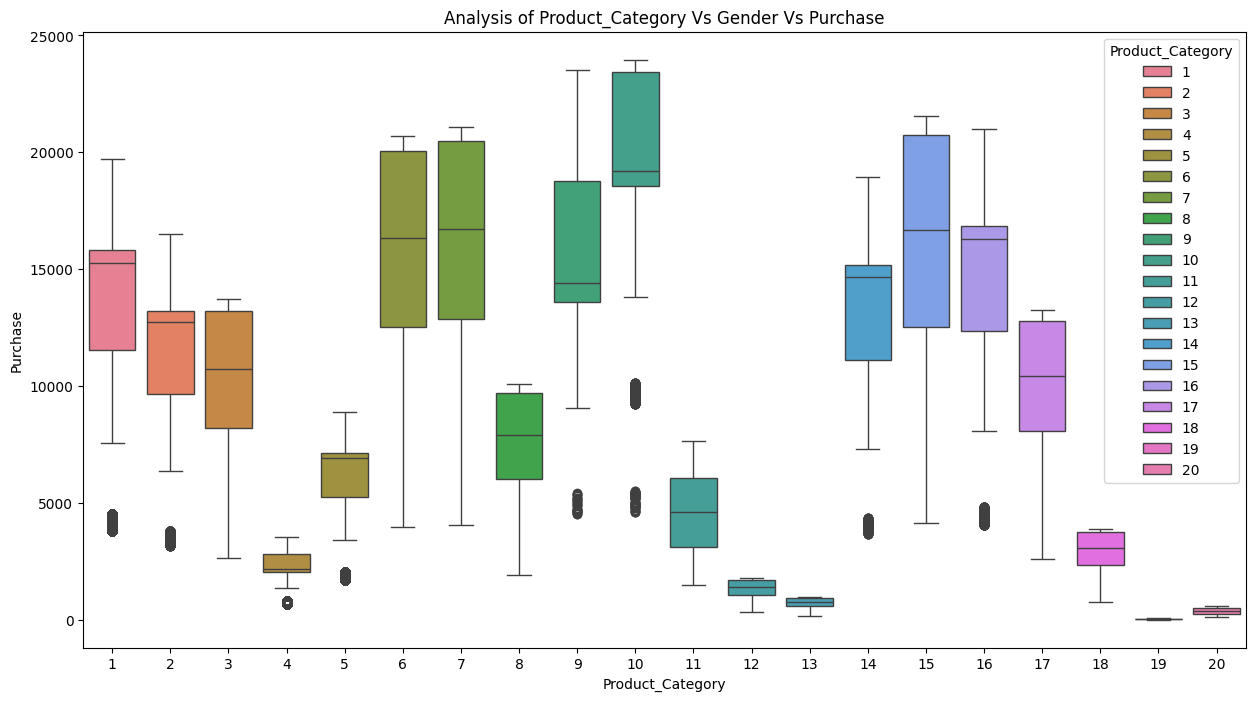

In [36]:
# Analysis of Product_Category Vs Purchase:
plt.figure(figsize=(15, 8))
sns.boxplot(data = df, x="Product_Category", y="Purchase",hue = "Product_Category")
plt.title('Analysis of Product_Category Vs Gender Vs Purchase')
plt.xlabel('Product_Category')
plt.ylabel('Purchase')
plt.show()

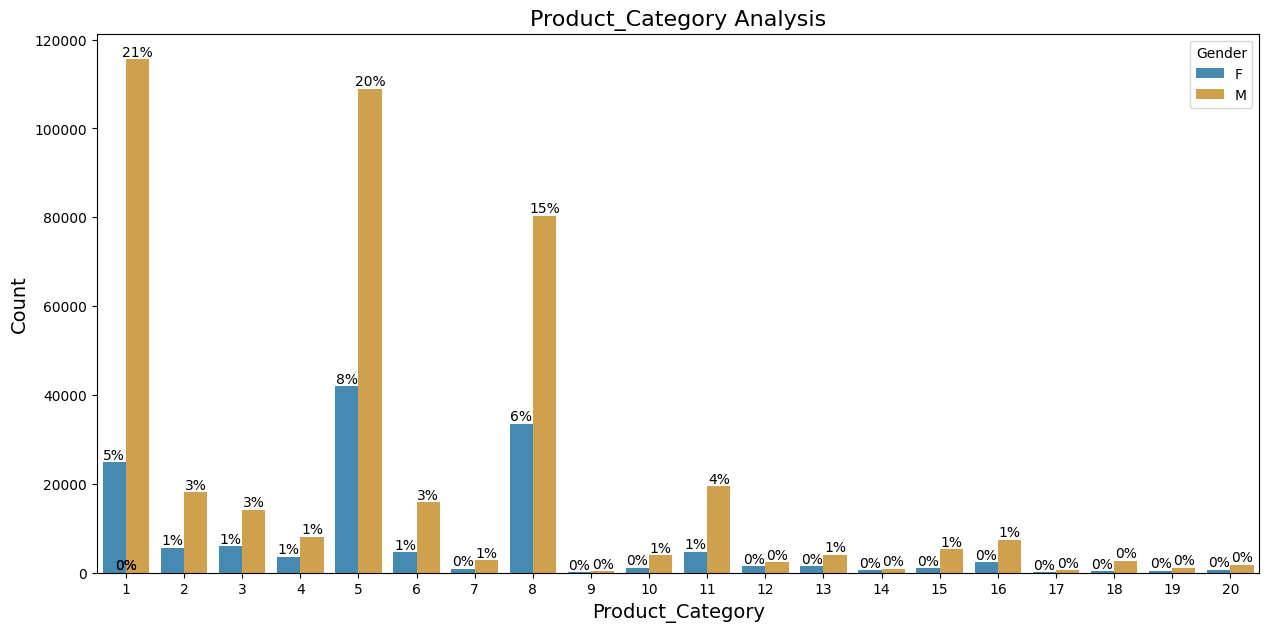

In [37]:
# Product_Category Analysis:
# Create the count plot
plt.figure(figsize=(15, 7))
ax = sns.countplot(x = "Product_Category", data = df, palette="colorblind", hue = "Gender", alpha=0.8)

# Calculate the percentage contribution of each age category
total_count = len(df)
for patch in ax.patches:
    height = patch.get_height()
    pct = (height / total_count) * 100
    ax.annotate(f'{pct:.0f}%', (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the title and axis labels of the plot
plt.title("Product_Category Analysis", fontsize=16)
plt.xlabel("Product_Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

# **Confidence Interval and CLT**⚓

# **Analysis of Gender on Purchase:**

In [38]:
#Descriptive stastistics of Gender:
df.groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


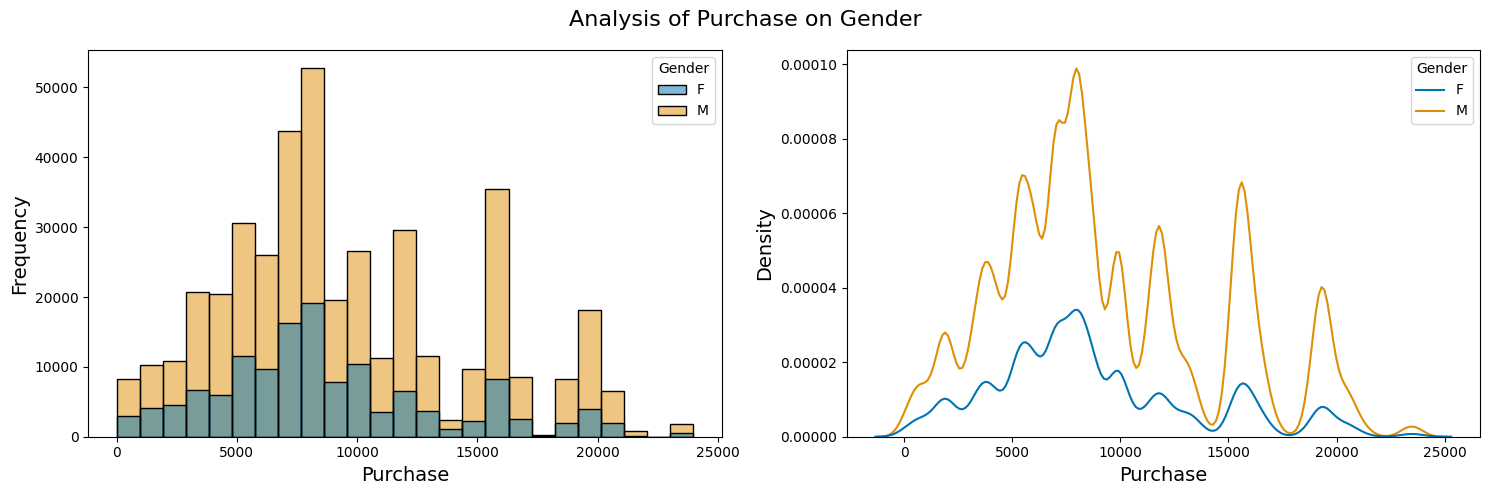

In [39]:
# Analysis of Purchase on Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x = "Purchase", bins = 25, hue = "Gender", palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x = "Purchase", hue = "Gender", palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.suptitle("Analysis of Purchase on Gender", fontsize = 16)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

The **Male has spend more** than Females

**Central Limit Theorom**

In [40]:
#Creating Male and Female dataframe separately:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [ ]:
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=95):
    ci = ci/100

    plt.figure(figsize=(14,6))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, fill = True)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linewidth = 1, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 1, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 1)

    sns.kdeplot(data = sample2_n, fill = True)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linewidth = 1, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 1, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 1)

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SE: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SE: {np.round(sem2,2)}",backgroundcolor="grey", color = "w")
    plt.legend()
    plt.xlabel('Purchase')
    plt.ylabel('Density')
    plt.show()

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

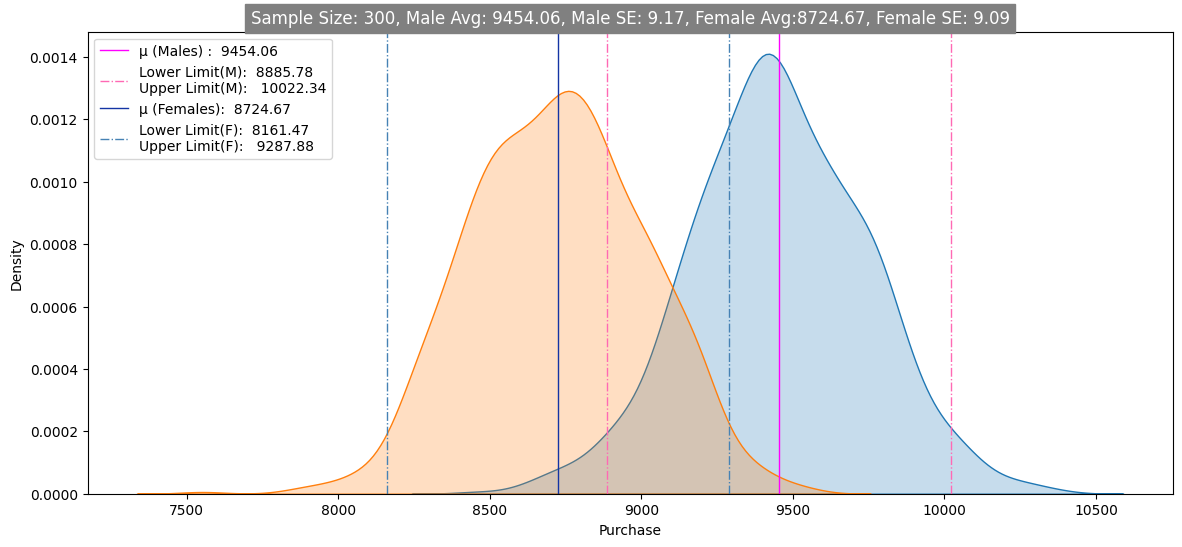

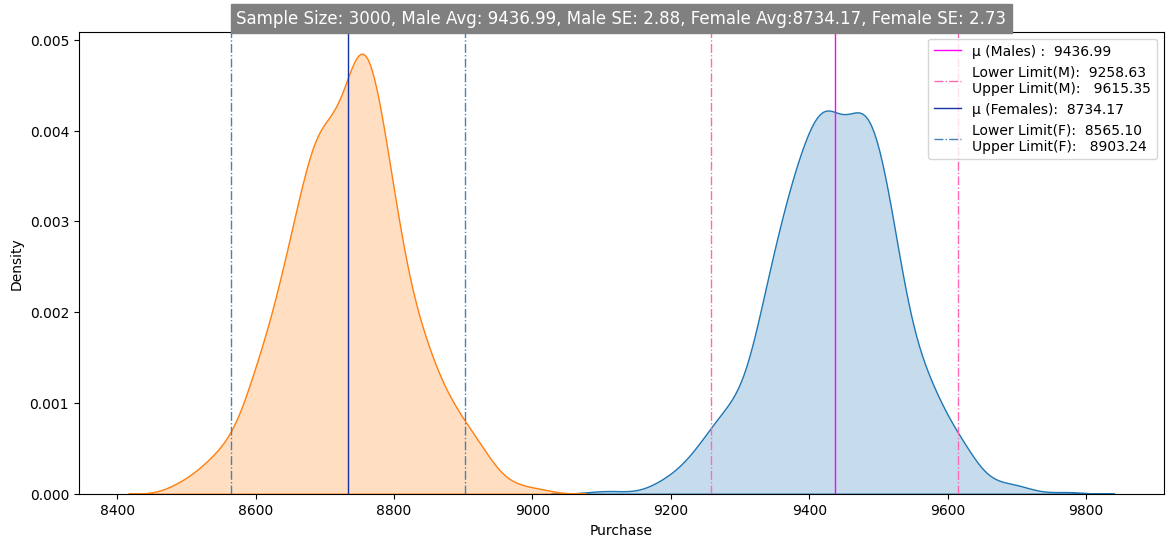

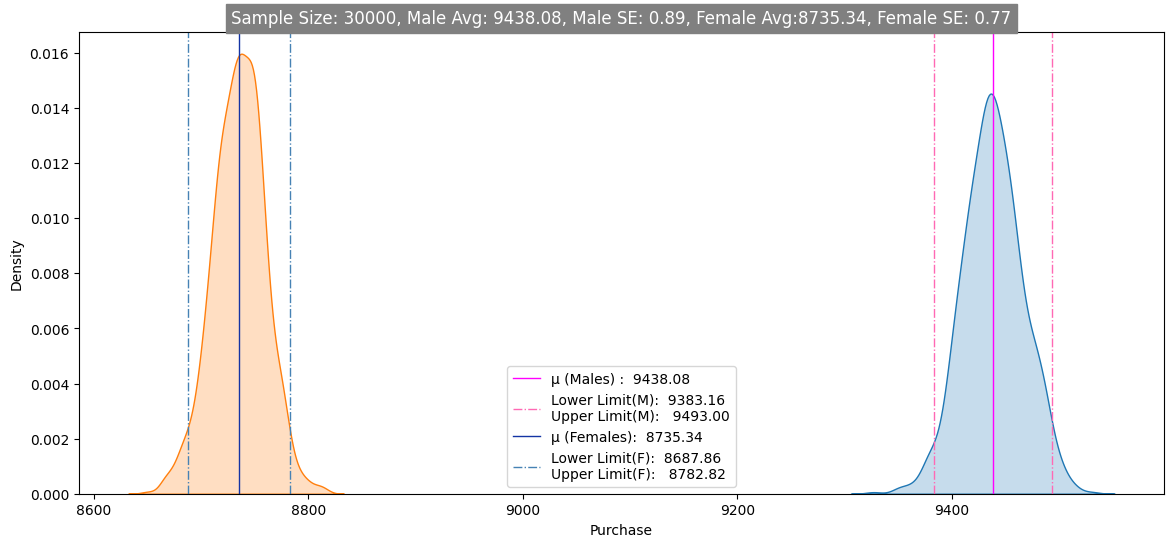

In [ ]:
sample_sizes = [300,3000,30000]
ci = 95
itr_size = 1000
res = []
for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)
    res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m})
    res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f})
res_df = pd.DataFrame(res)

In [ ]:
res_df

,Gender,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Interval Range,Range
0,M,300,8885.78,10022.34,9454.06,95,"[8885.78, 10022.34]",1136.56
1,F,300,8161.47,9287.88,8724.67,95,"[8161.47, 9287.88]",1126.41
2,M,3000,9258.63,9615.35,9436.99,95,"[9258.63, 9615.35]",356.72
3,F,3000,8565.10,8903.24,8734.17,95,"[8565.1, 8903.24]",338.14
4,M,30000,9383.16,9493.00,9438.08,95,"[9383.16, 9493.0]",109.84
5,F,30000,8687.86,8782.82,8735.34,95,"[8687.86, 8782.82]",94.96


**🔍OBSERVATION🔎**

For **95% Confidence interval** and **Sample sizes 300,3000,30000.**

1) For **Sample size of 300**,
* **Male** Interval Range is **[8885.78, 10022.34].**
* **Female** Interval Range is **[8161.47, 9287.88].**
* The Male and Female data gets **overlaped.**

2) For **Sample size of 3,000,**
* **Male** Interval Range is **[9258.63, 9615.35].**
* **Female** Interval Range is **[8565.1, 8903.24].**
* The Male and Female data **do not overlape.**

3) For **Sample size of 30,000,**
* **Male** Interval Range is **[9383.16, 9493.0].**
* **Female** Interval Range is **[8687.86, 8782.82].**
* The Male and Female data **do not overlape.**

**CONCLUSION😀**

* When the **sample size gets increased Interval Range gets drasticaly reduced ie) the spread of the data becomes reduced** and it is **more accurate towards the population mean.**

* Since the distribution **do not overlap** when the sample size increases we can say that **the purchasing behaviour of male and female are different.**

# **Analysis of Marital Status on Purchase:**

In [ ]:
#Descriptive stastistics of Gender:
df.groupby(["Marital_Status"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Single,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


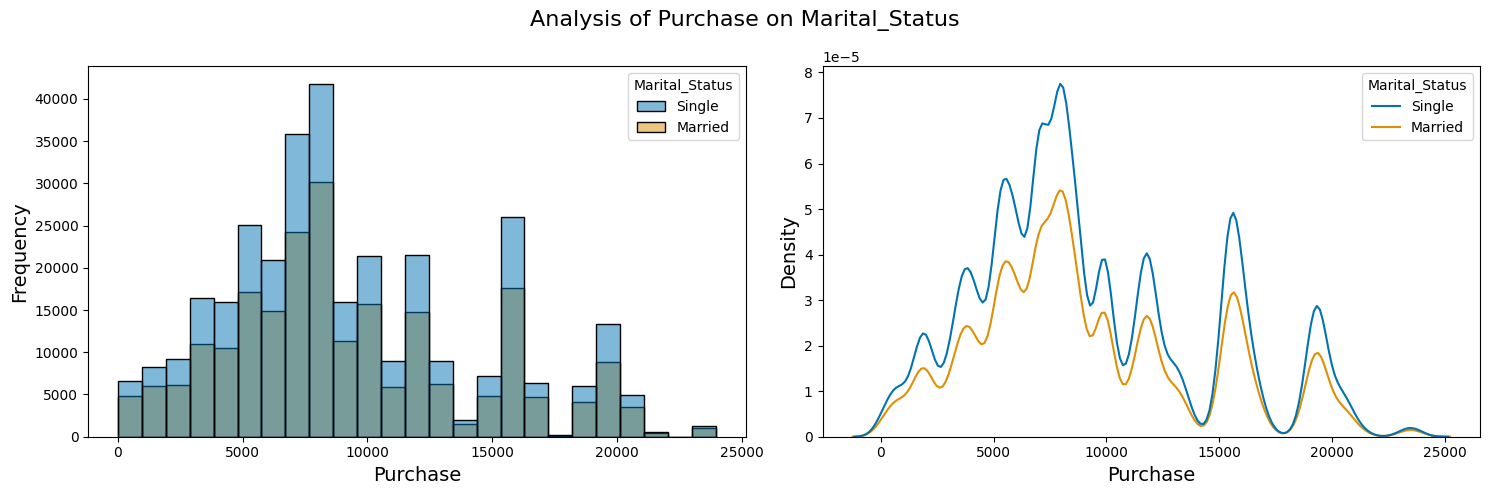

In [ ]:
# Analysis of Purchase on Marital_Status
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x = "Purchase", bins = 25, hue = "Marital_Status", palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x = "Purchase", hue = "Marital_Status", palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.suptitle("Analysis of Purchase on Marital_Status", fontsize = 16)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

The **Singles has spend more** than Married.

**Central Limit Theorom**

In [41]:
#Creating Male and Female dataframe separately:
df_single = df[df['Marital_Status']=='Single']
df_married = df[df['Marital_Status']=='Married']

In [46]:
def bootstrap_m_vs_um(sample1,sample2,sample_size,itr_size=1000,ci=95):
    ci = ci/100

    plt.figure(figsize=(14,6))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, fill = True)
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 1, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 1, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 1)

    sns.kdeplot(data = sample2_n, fill = True)
    label_mean2=("μ (Single):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 1, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 1, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 1)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SE: {np.round(sem1,2)}, Single Avg:{np.round(mean2, 2)}, Single SE: {np.round(sem2,2)}", backgroundcolor="grey", color = "w")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

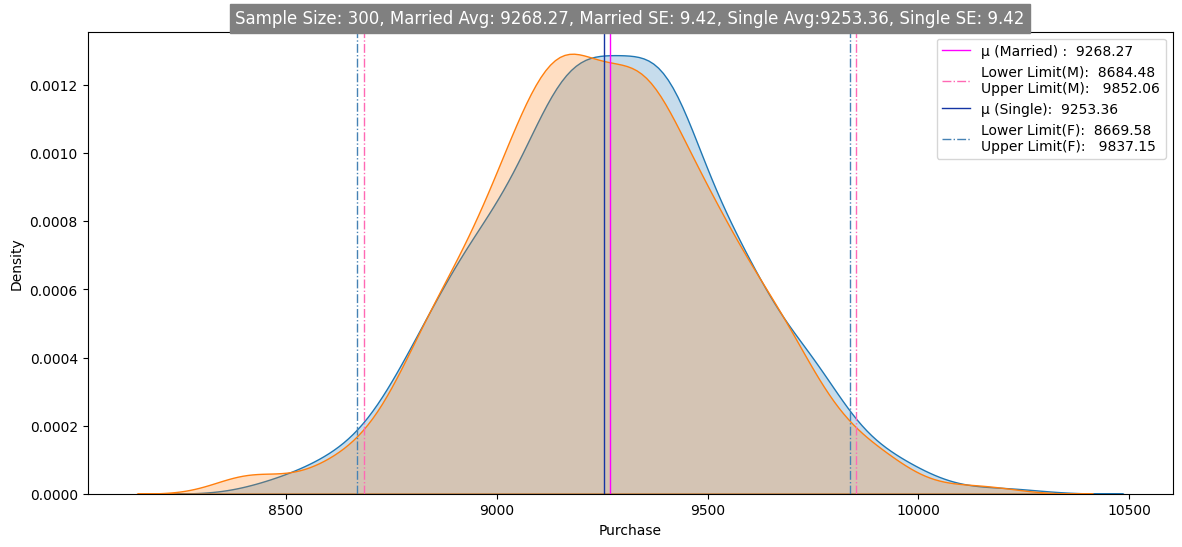

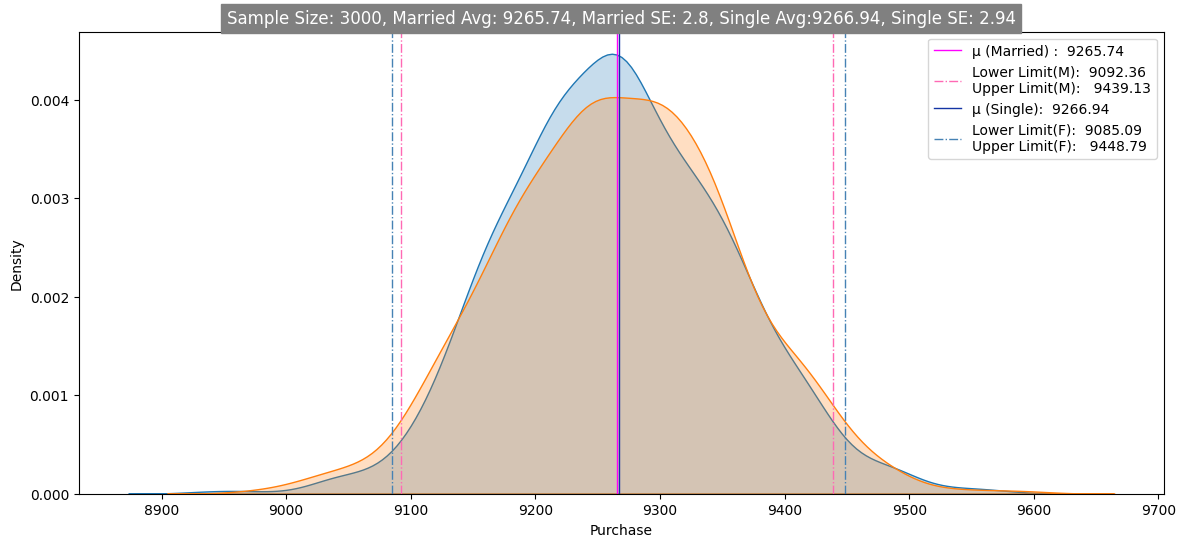

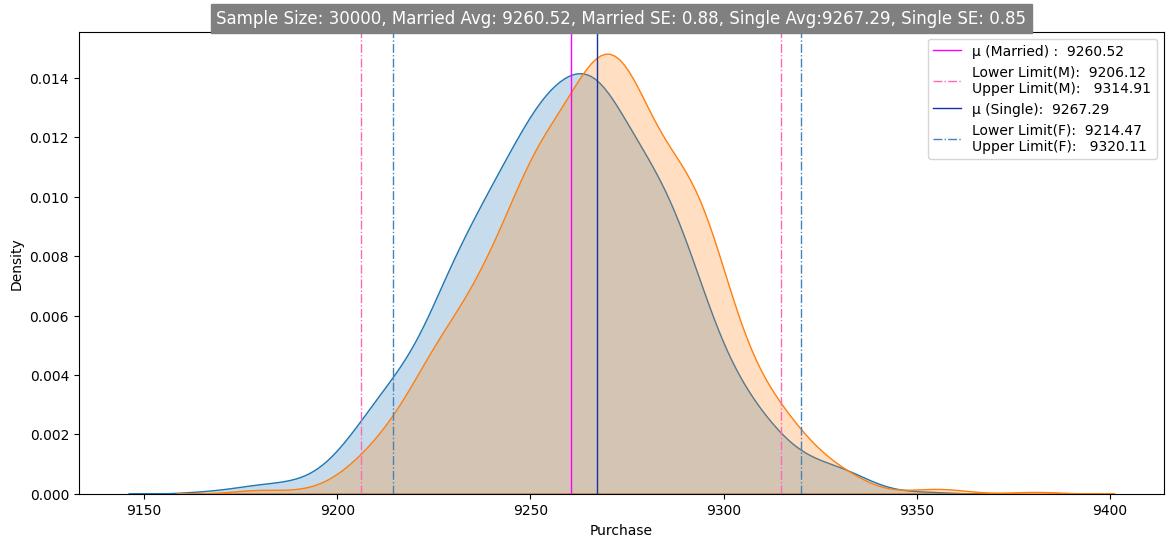

In [47]:
sample_sizes = [300,3000,30000]
ci = 95
itr_size = 1000

res = []
for i in sample_sizes:
    m_avg, s_avg, ll_m, ul_m, ll_s, ul_s = bootstrap_m_vs_um(df_married['Purchase'],df_single['Purchase'],i,itr_size,ci)
    res.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m})
    res.append({'Marital_Status':'Single','Sample Size':i,'Lower Limit':ll_s,'Upper Limit':ul_s,'Sample Mean':s_avg,'Confidence Interval':ci,'Interval Range':[ll_s,ul_s],'Range': ul_s-ll_s})
res_df = pd.DataFrame(res)

In [48]:
res_df

,Marital_Status,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Interval Range,Range
0,Married,300,8684.48,9852.06,9268.27,95,"[8684.48, 9852.06]",1167.58
1,Single,300,8669.58,9837.15,9253.36,95,"[8669.58, 9837.15]",1167.57
2,Married,3000,9092.36,9439.13,9265.74,95,"[9092.36, 9439.13]",346.77
3,Single,3000,9085.09,9448.79,9266.94,95,"[9085.09, 9448.79]",363.70
4,Married,30000,9206.12,9314.91,9260.52,95,"[9206.12, 9314.91]",108.79
5,Single,30000,9214.47,9320.11,9267.29,95,"[9214.47, 9320.11]",105.64


**🔍OBSERVATION🔎**

For **95% Confidence interval** and **Sample sizes 300,3000,30000.**

1) For **Sample size of 300**,
* **Married** Interval Range is **[8684.48, 9852.06].**
* **Single** Interval Range is **[8669.58, 9837.15].**
* The Male and Female data gets **overlaped.**

2) For **Sample size of 3000**,
* **Married** Interval Range is **[9092.36, 9439.13].**
* **Single** Interval Range is **[9085.09, 9448.79].**
* The Male and Female data gets **overlaped.**

3) For **Sample size of 3000**,
* **Married** Interval Range is **[9206.12, 9314.91].**
* **Single** Interval Range is **[9214.47, 9320.11].**
* The Male and Female data gets **overlaped.**

**CONCLUSION😀**

* When the **sample size gets increased Interval Range gets drasticaly reduced ie) the spread of the data becomes reduced** and it is **more accurate towards the population mean.**

* Since for all the three sample size the **distribution gets overlapped** we can say that **even though the single purchase is large, the mean amount for both Single and married are almost same  and the purchasing behaviour looks similar.**

# **Analysis of Age on Purchase:**

In [ ]:
#Descriptive stastistics of Age:
df.groupby(["Age"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


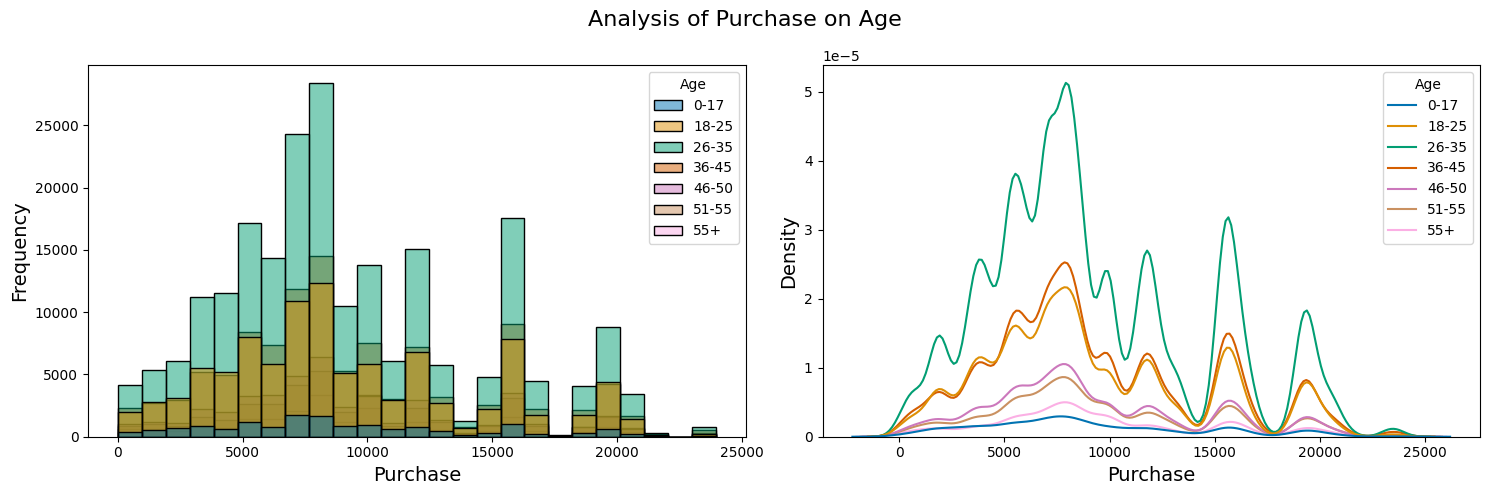

In [ ]:
# Analysis of Purchase on Age
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x = "Purchase",hue = "Age",bins = 25, palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x = "Purchase", hue = "Age", palette="colorblind")
plt.xlabel("Purchase", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.suptitle("Analysis of Purchase on Age", fontsize = 16)
plt.tight_layout()
plt.show()

**Central Limit Theorom**

In [ ]:
def bootstrrap(sample,sample_size,itr_size,ci):
   ci = ci/100
   sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

   mean  = np.mean(sample_n)
   sigma = np.std(sample_n)
   sem   = stats.sem(sample_n)

   lower_limit = norm.ppf((1-ci)/2) * sigma + mean
   upper_limit = norm.ppf(ci + (1-ci)/2) * sigma + mean

   return sample_n, round(mean,2), round(lower_limit,2), round(upper_limit,2)

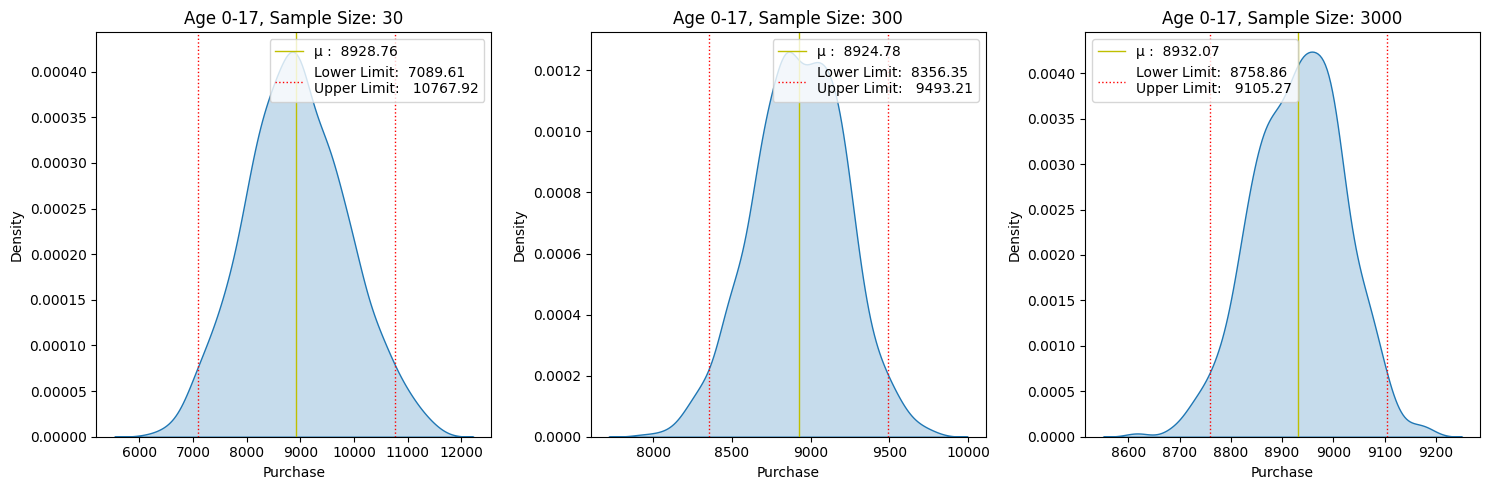

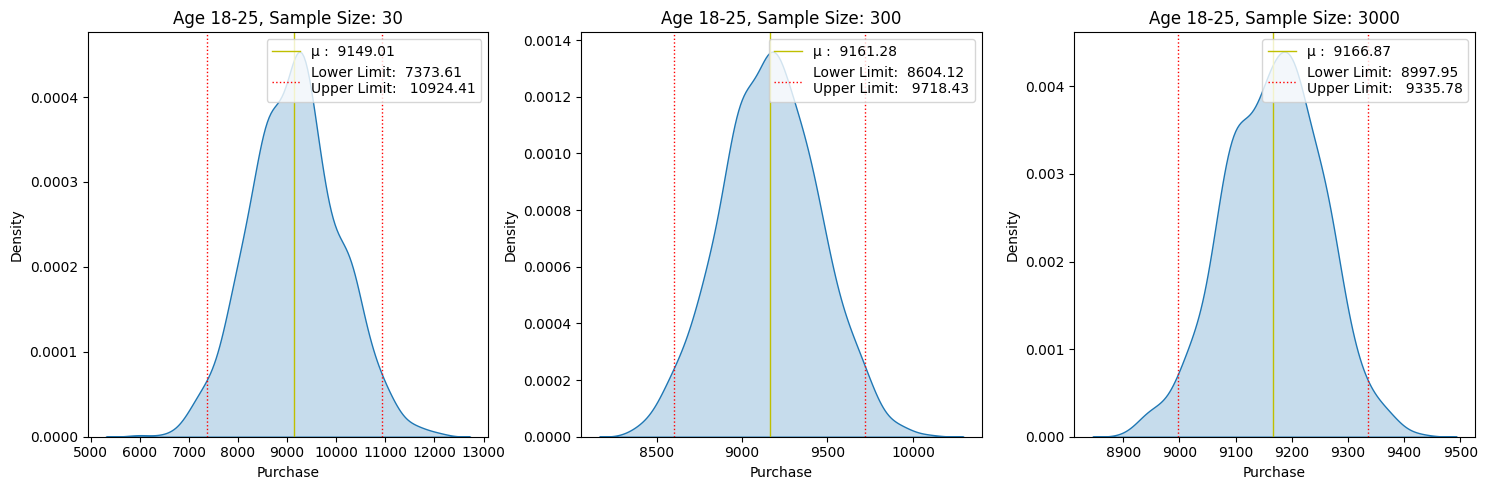

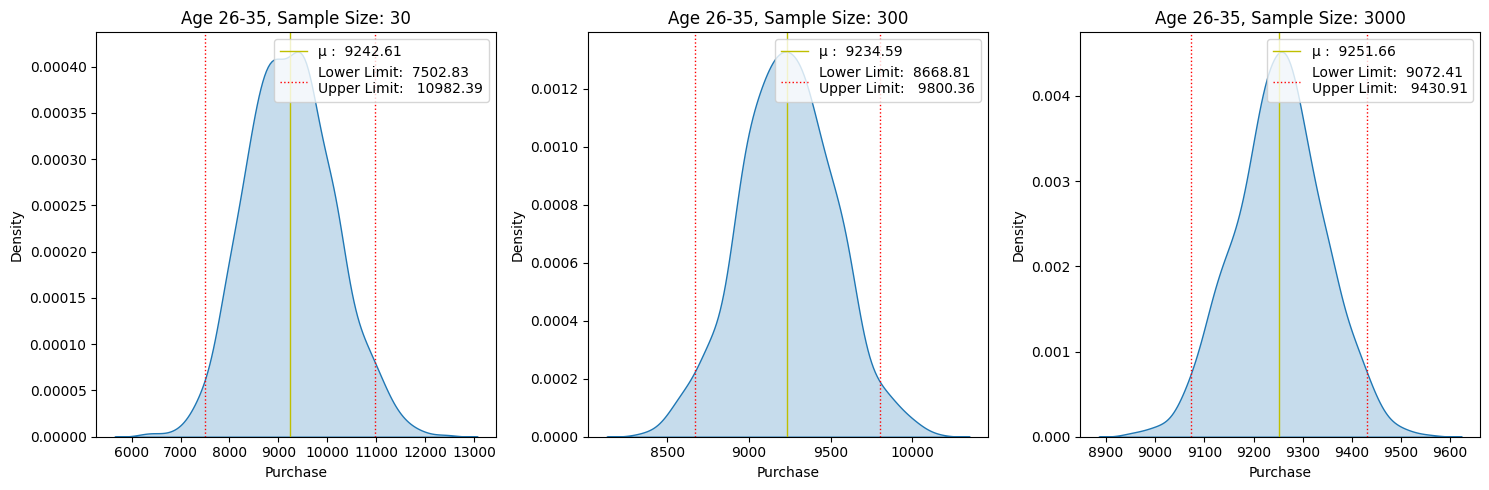

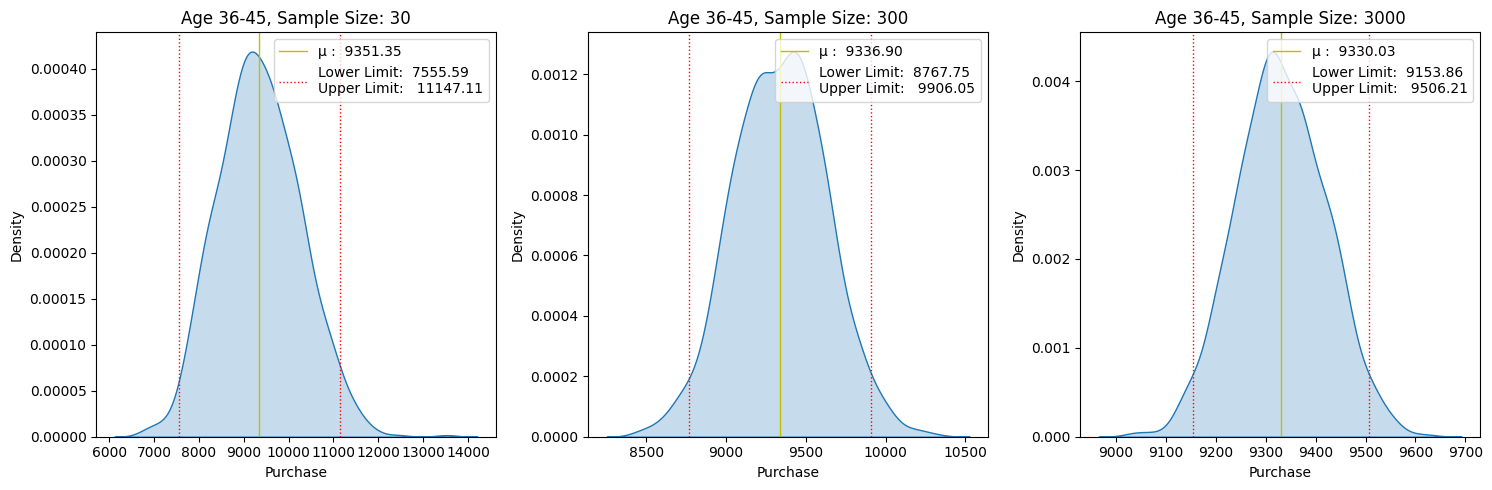

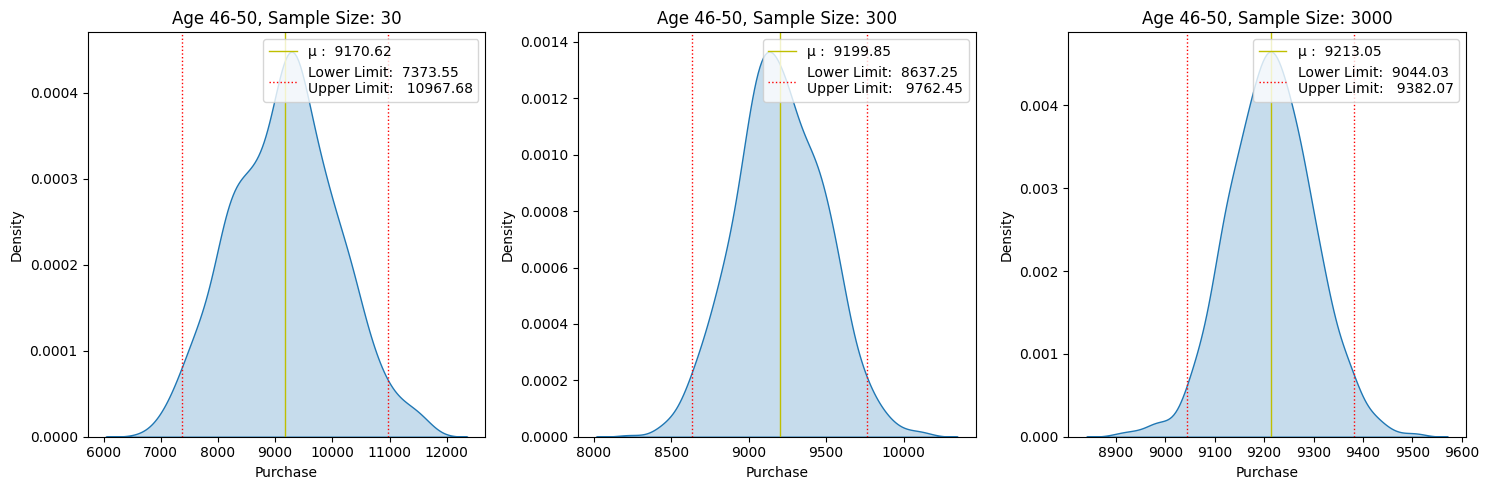

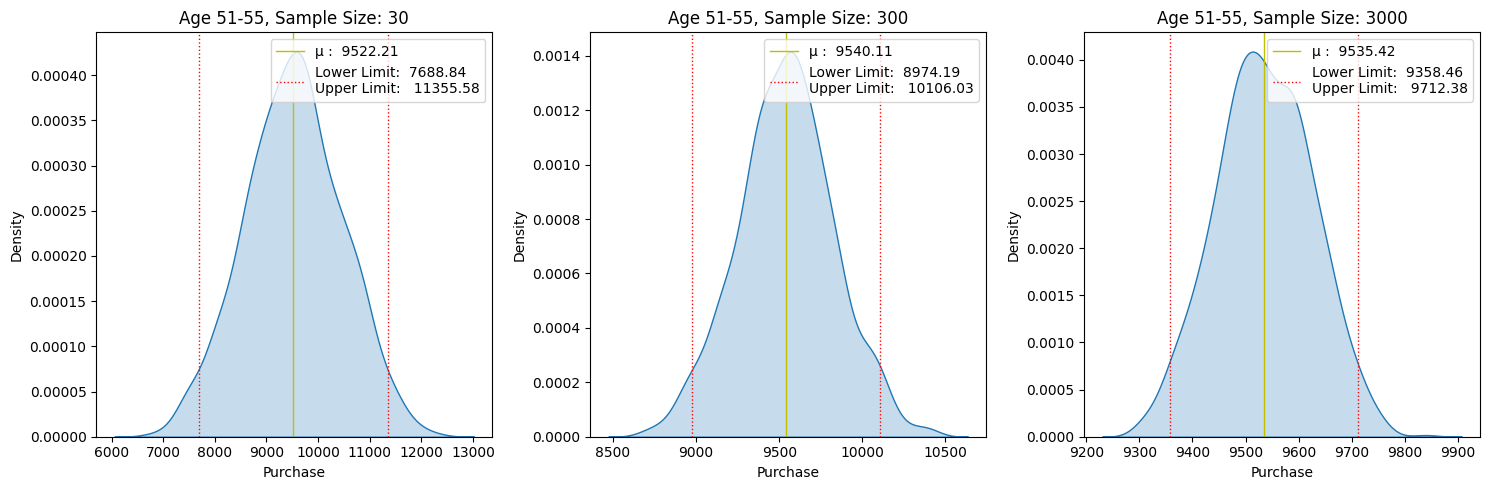

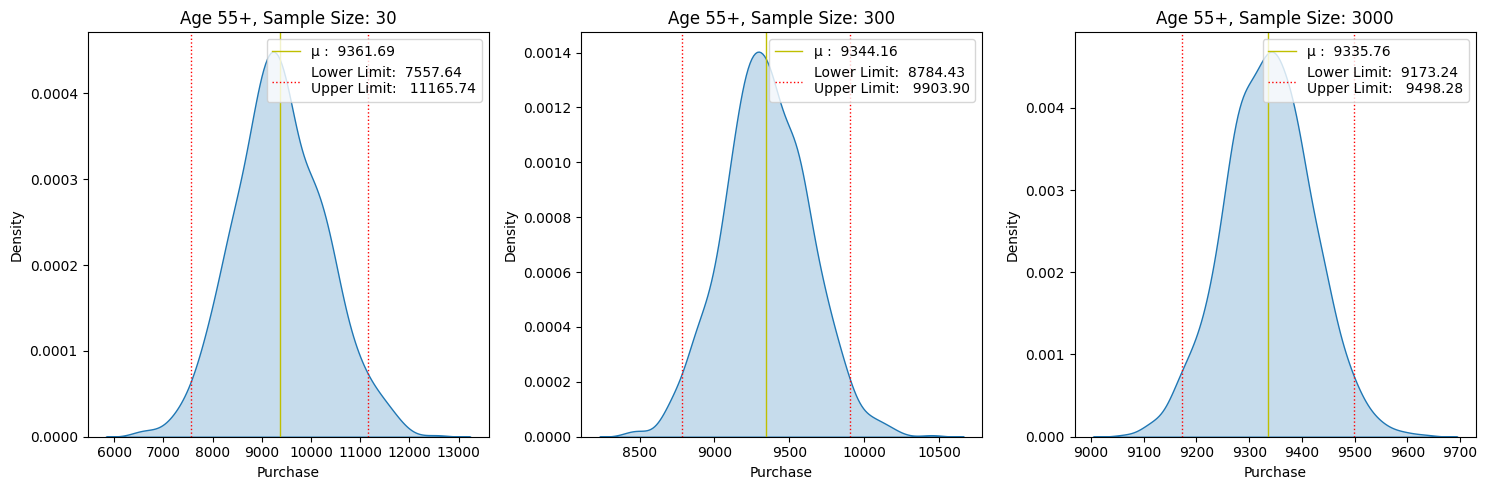

In [ ]:
# CLT for age group:
ages = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sample_size = [30,300,3000]
ci = 95
itr_size = 1000

# Creating loop for the operation:
for i in range(len(ages)):

  plt.figure(figsize=(15, 5))
  for j in  range(len(sample_size)):
    plt.subplot(1,3,j+1)

    # Preparing Data:
    data = df[df["Age"] == ages[i]]
    sample = data["Purchase"]

    # Calling Function:
    sample_n, mean, lower_limit, upper_limit = bootstrrap(sample,sample_size[j],itr_size, ci)

    # Creating plot
    sns.kdeplot(data=sample_n,fill=True)
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    plt.title(f"Age {ages[i]}, Sample Size: {sample_size[j]}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 1,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 1,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 1)
    plt.legend()

  plt.tight_layout()
  plt.show()

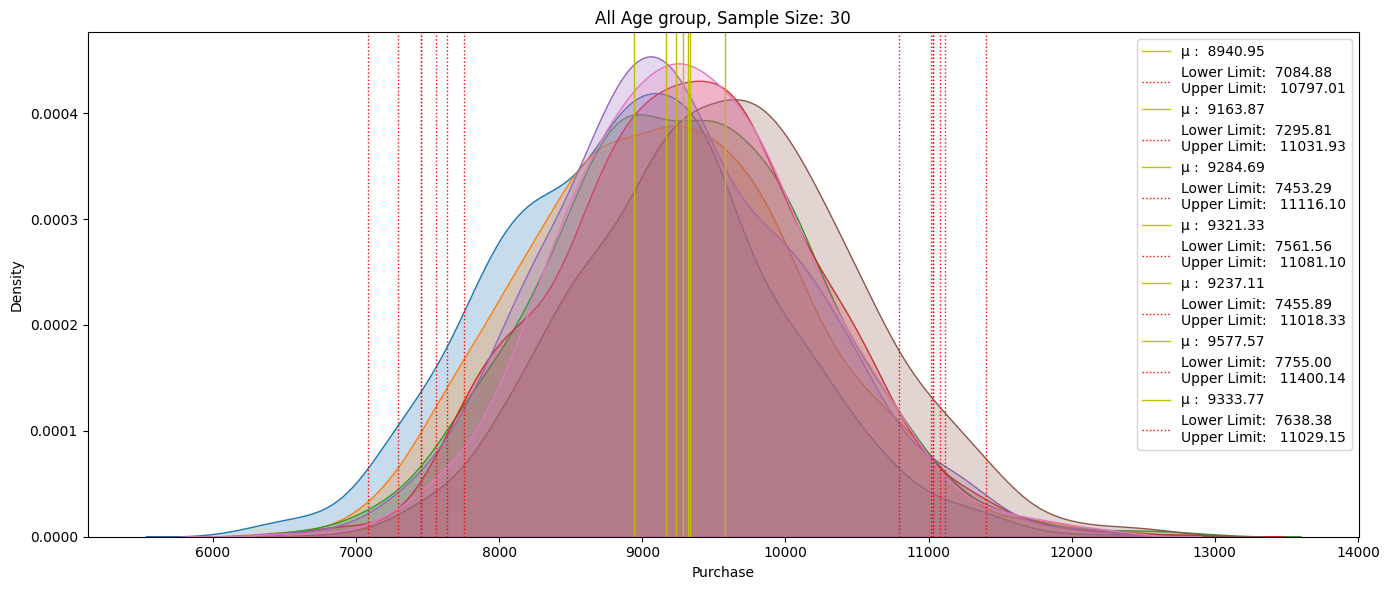

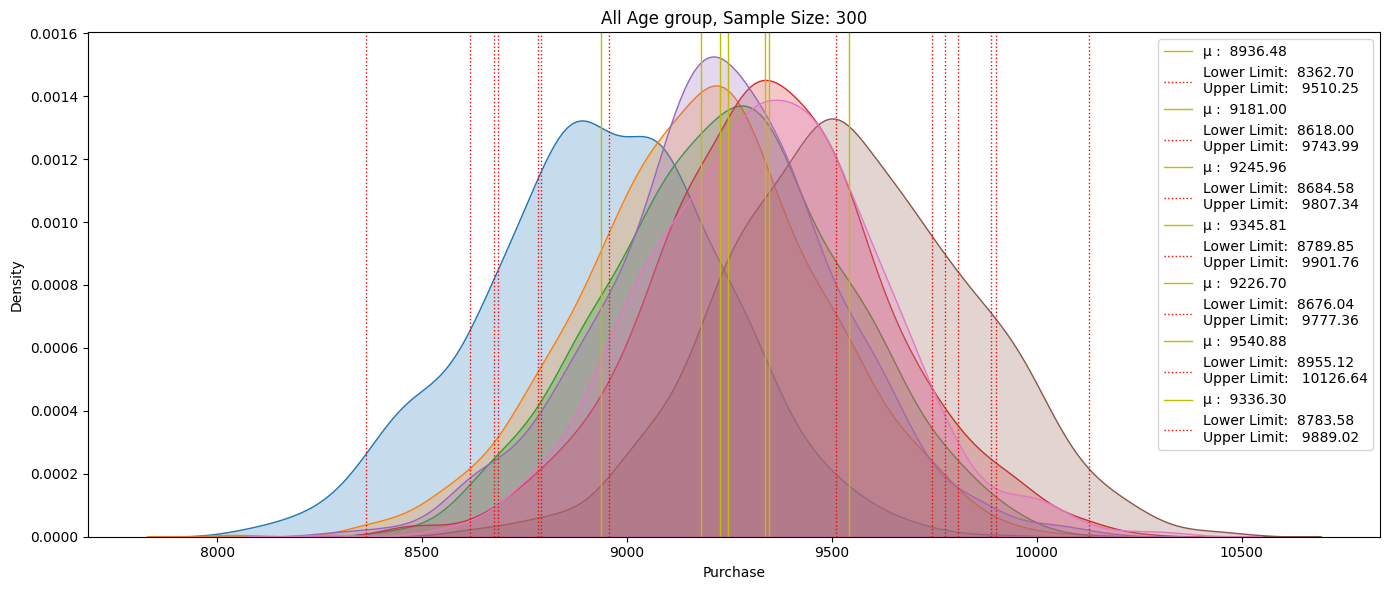

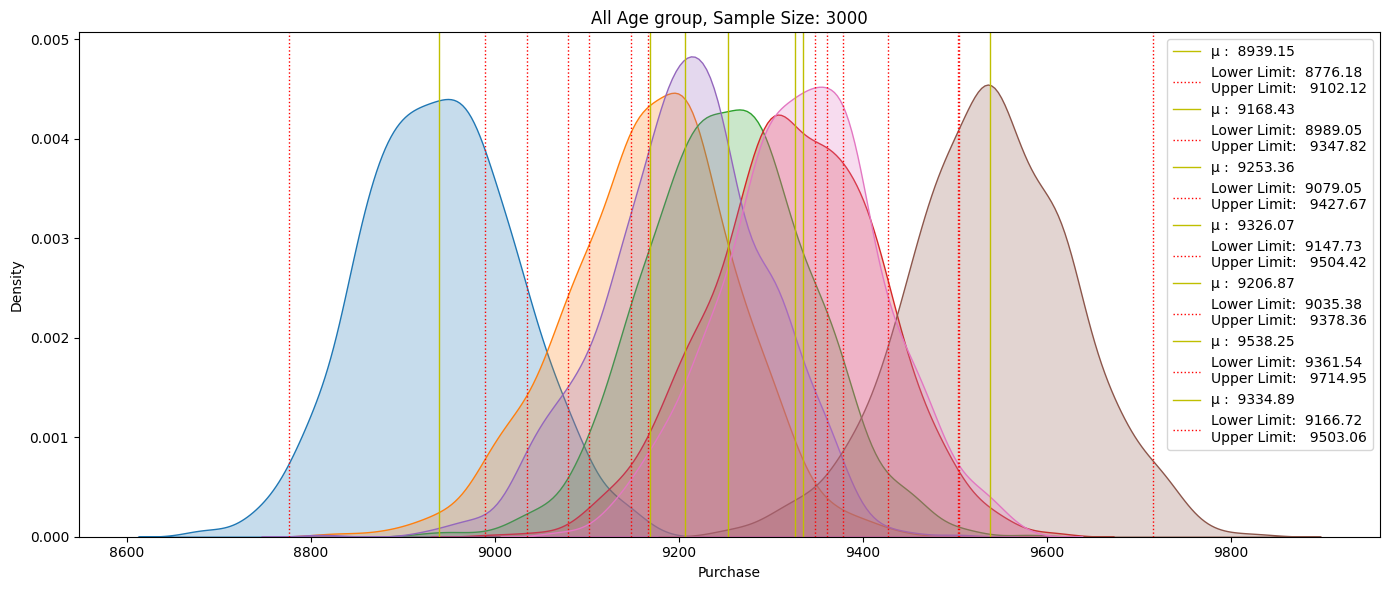

In [ ]:
# Checking for any overlap:
ages = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sample_size = [30,300,3000]
ci = 95
itr_size = 1000

# Creating loop for the operation:
for j in  range(len(sample_size)):

  plt.figure(figsize=(14, 6))
  for i in range(len(ages)):
    #plt.subplot(1,3,j+1)

    # Preparing Data:
    data = df[df["Age"] == ages[i]]
    sample = data["Purchase"]

    # Calling Function:
    sample_n, mean, lower_limit, upper_limit = bootstrrap(sample,sample_size[j],itr_size, ci)

    # Creating plot
    sns.kdeplot(data=sample_n,fill=True)
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    plt.title(f"All Age group, Sample Size: {sample_size[j]}")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 1,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 1,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 1)
    plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
# Creating Table for CLT:
ages = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sample_size = [30,300,3000]
ci = 95
itr_size = 1000

final = []
# Creating loop for the operation:
for j in  range(len(sample_size)):

  res = []
  for i in range(len(ages)):

    # Preparing Data:
    data = df[df["Age"] == ages[i]]
    sample = data["Purchase"]

    # Calling Function:
    sample_n, mean, ll, ul = bootstrrap(sample,sample_size[j],itr_size, ci)

    res.append({'Age_Group':ages[i],'Sample Size':sample_size[j],'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll})
  final.append(res)

flat_data = []
for item in final:
  for sublist in item:
    flat_data.append(sublist)

final_df = pd.DataFrame(flat_data)

In [ ]:
final_df

,Age_Group,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Interval Range,Range
0,0-17,30,7103.16,10788.54,8945.85,95,"[7103.16, 10788.54]",3685.38
1,18-25,30,7330.91,10970.03,9150.47,95,"[7330.91, 10970.03]",3639.12
2,26-35,30,7484.02,11005.97,9244.99,95,"[7484.02, 11005.97]",3521.95
3,36-45,30,7557.34,11167.55,9362.45,95,"[7557.34, 11167.55]",3610.21
4,46-50,30,7372.42,10972.69,9172.55,95,"[7372.42, 10972.69]",3600.27
5,51-55,30,7690.71,11412.26,9551.49,95,"[7690.71, 11412.26]",3721.55
6,55+,30,7526.27,11125.18,9325.72,95,"[7526.27, 11125.18]",3598.91
7,0-17,300,8355.14,9489.35,8922.25,95,"[8355.14, 9489.35]",1134.21
8,18-25,300,8581.32,9727.00,9154.16,95,"[8581.32, 9727.0]",1145.68
9,26-35,300,8673.44,9803.49,9238.47,95,"[8673.44, 9803.49]",1130.05


**🔍OBSERVATION🔎**

* The sample sizes take for analysis are **30,300 and 3000** with **95% Confidence Interval.**

* When the **sample size gets increased Interval Range gets drasticaly reduced ie) the spread of the data becomes reduced** and it is **more accurate towards the population mean.**

* For **Sample size 30**, all the **distributions of age groups** are **overlapping.**

* For **Sample size 300** also, all the **distributions of age groups** are **overlapping.** but slightly started deviating.

* For **Sample size 3000** for **age group 0-17 and 55+, the distribution does not overlap ie) we could see the noticable difference in the purchase behaviour of the age group 0-17 and 55+** and for othere the distribution is overlapping.


# **Inferences👉**  
* **Gender:🎯**
    
    * The **male**♂ customers are around **75%**
    * The **Female**♀ customers are around **25%**
    * The **Male customers have contributed for sale**🤑 more than female.

* **Age:🎯**
    * 🥇The customers in the age group of **26-35**🤑 are around **40%**
    * 🥈The customers in the age group of **36-45**💰 are around **20%**
    * 🥉The customers in the age group of **18-25**💰 are around **18%**
    * In the **age group** category of **46-50**, **Married customers purchase are high.**🤑
    * In the **age group** category of **55+**, **Unmarried customers purchase are high.**🤑

* **Occupation:🎯**
    * 🥇The customers in the **occupation category of 4**🤑 are around **13%**
    * 🥈The customers in the **occupation category of 0**💰 are around **12.7%**
    * 🥉The customers in the **occupation category of 7**💰 are around **10.8%**
    * **The occupation category 8, 12, 15 and 17** has highest amouunt of purchase.🤑


* **City Category:🎯**
    * 🥇The customers in the **city category B**🤑 are around **42%**
    * 🥈The customers in the **city category C**💰 are around **31%**
    * 🥉The customers in the **city category A**💰 are around **27%**
    * The **city category C have contributed more contribution for purchase**🤑

* **Stay in current city:🎯**
    * 🥇The customers who are in the **current city for around 1 year**🤑are around **35%**
    * 🥇The customers who are in the **current city for around 2 years**💰are around **18.5%**
    * 🥉The customers who are in the **current city for around 3 years**💰are around **17%**
    * For **stay in current years for 2 and 3 years**🤑, have contributed more regarding purchase.

* **Martital Status:🎯**
    * 🥇The **Single**🤑 customers are around **60%**
    * 🥈The **Married**💰 customers are around **40%**

* **Product Category:🎯**
    * 🥇The customers prefer **product category 5** are around **27%**
    * 🥈The customers prefer **product category 1** are around **25%**
    * 🥉The customers prefer **product category 8** are around **20%**

* **Purchase:🎯**
    * The most common purchase amounts are between **5000 to 10,000 dollar**💸
    * **Median** purchase amount is **8047.0 dollar**💸

* **Central Limit Theorem:🎯**
  * **Gender on Purchase:**
    * The **Male has spend more** than Female.
    * Since the distribution **do not overlap** when the sample size increases we can say that **the purchasing behaviour of male and female are different.**
  * **Marital Status on Purchase:**
    * The **Singles has spend more** than Married.
    * Since for all the three sample size the **distribution gets overlapped** we can say that **even though the single purchase is large, the mean amount for both Single and married are almost same  and the purchasing behaviour looks similar.**

  * **Age on Purchase**
    * For **Sample size 3000** for **age group 0-17 and 55+, the distribution does not overlap ie) we could see the noticable difference in the purchase behaviour of the age group 0-17 and 55+** and for othere the distribution is overlapping.



# **Recommendations🤝**

💡 **Targeted Marketing Campaigns:**

  * Develop targeted marketing campaigns that cater to the preferences and **shopping habits of male customers, above given age group, occupation, city category, stay in current city category, marrital status and product category**, considering that they make up the majority of the customer base. **Tailor advertising messages, promotions, and product offerings to appeal to male consumers.**

💡 **Married Customer Engagement:**

  * **Develop special promotions, loyalty programs, and targeted advertising campaigns** to appeal to **married customers in the 46-50 age group**. Focus on products and services that cater to their household needs, family-oriented activities, and long-term purchasing habits.

💡 **Unmarried Customer Engagement:**

  * Similarly, **develop targeted marketing strategies** to engage **unmarried customers in the 55+ age group.** Highlight products and services that cater to their independent lifestyles, leisure activities, and personal interests. **Consider offering discounts, incentives, or loyalty rewards** to attract and retain this segment of customers.

💡 **Health and Wellness Offerings:**

* Given that **older age groups may prioritize health and wellness**, consider expanding the selection of health-focused products, organic foods, and nutritional supplements in grocery stores and supercenters. **Offer educational resources, workshops, or events focused on healthy living and aging well.**

💡 **Promotional Offers and Discounts:**

  * **Offer promotional deals, discounts, or bundle offers** for products commonly purchased within the **5000 to 10,000 dollar price range**. This can incentivize customers to make larger purchases and increase overall sales volume.
  
  * **Offer financing or installment payment options** for customers making purchases in the **5000 to 10,000 dollar price range**. Partner with financial institutions to provide flexible payment plans that make larger purchases more accessible to customers.

💡 **Feedback and Continuous Improvement:**

  * C**ollect feedback from customers** in different age group, occupation, city category, stay in current city category, marrital status and product category **through surveys, focus groups, and social media channels**. Use this feedback to identify areas for improvement and innovation, ensuring that products, services, and store experiences remain relevant and appealing to customers of all ages.

💡**Employee Training and Diversity:**

  * **Train employees to provide excellent customer service and engage with customers of all ages in a friendly and respectful manner**. Promote diversity and inclusivity in the workforce to create a welcoming and inclusive environment for customers from diverse age groups.



---



---

